In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\vaish\\Downloads\\train.csv",na_values="NAN")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#** data cleaning **

In [7]:
pd.options.display.max_rows = 100

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [9]:
print("Total number of missing values")
print(30 * "-")
print(missing_value_df.sort_values("percent_missing"))



Total number of missing values
------------------------------
                 column_name  percent_missing
Id                        Id         0.000000
TotalBsmtSF      TotalBsmtSF         0.000000
Heating              Heating         0.000000
SaleCondition  SaleCondition         0.000000
CentralAir        CentralAir         0.000000
1stFlrSF            1stFlrSF         0.000000
2ndFlrSF            2ndFlrSF         0.000000
LowQualFinSF    LowQualFinSF         0.000000
GrLivArea          GrLivArea         0.000000
BsmtFullBath    BsmtFullBath         0.000000
BsmtHalfBath    BsmtHalfBath         0.000000
FullBath            FullBath         0.000000
HalfBath            HalfBath         0.000000
BedroomAbvGr    BedroomAbvGr         0.000000
KitchenAbvGr    KitchenAbvGr         0.000000
KitchenQual      KitchenQual         0.000000
TotRmsAbvGrd    TotRmsAbvGrd         0.000000
Functional        Functional         0.000000
SaleType            SaleType         0.000000
YrSold            

In [10]:
# the following columns have missing values. replace the values appropriately.
#Electrical,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,
#GarageYrBlt,GarageType,GarageCond,LotFrontage
#the NAN represents None based on data dictionary

In [11]:
# checking the NAN values
df["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [12]:
df["PoolQC"] = df["PoolQC"].isna().sum()


In [13]:
df["MiscFeature"] = df["MiscFeature"].replace(np.nan,"NoMiscFeature")

In [14]:
df["Alley"] = df["Alley"].replace(np.nan,"NoAlley")

In [15]:
df["Fence"] = df["Fence"].replace(np.nan,"NoFence")

In [16]:
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [17]:
df["MasVnrType"].isna().sum()

8

In [18]:
df["MasVnrType"] = df["MasVnrType"].replace(np.nan,"NoMasVnrType")

In [19]:
df["MasVnrArea"].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [20]:
df["MasVnrArea"].isna().sum()

8

In [21]:
mdn = df["MasVnrArea"].median()
df["MasVnrArea"] = df["MasVnrArea"].replace(np.nan,mdn)

In [22]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [23]:
df["BsmtQual"].isna().sum()

37

In [24]:
 df["BsmtQual"] = df["BsmtQual"].replace(np.nan,"NoBasement")

In [25]:
df["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [26]:
df["BsmtCond"].isna().sum()

37

In [27]:
 df["BsmtCond"] = df["BsmtCond"].replace(np.nan,"NoBasement")

In [28]:
df["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [29]:
df["BsmtFinType1"].isna().sum()

37

In [30]:
df["BsmtFinType1"] = df["BsmtFinType1"].replace(np.nan,"NoBasement")

In [31]:
df["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [32]:
df["BsmtFinType2"].isna().sum()

38

In [33]:
df["BsmtFinType2"] = df["BsmtFinType2"].replace(np.nan,"NoBasement")

In [34]:
df["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
df["BsmtExposure"].isna().sum()

38

In [36]:
df["BsmtExposure"] = df["BsmtExposure"].replace(np.nan,"NoBasement")

In [37]:
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [38]:
df["GarageQual"].isna().sum()

81

In [39]:
df["GarageQual"] = df["GarageQual"].replace(np.nan,"NoGarage")

In [40]:
df["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [41]:
df["GarageFinish"].isna().sum()

81

In [42]:
df["GarageFinish"] = df["GarageFinish"].replace(np.nan,"NoGarage")

In [43]:
df["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [44]:
df["GarageYrBlt"].isna().sum()

81

In [45]:
mdn = df["GarageYrBlt"].median()
df["GarageYrBlt"] = df["GarageYrBlt"].replace(np.nan,mdn)

In [46]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [47]:
df["GarageType"].isna().sum()

81

In [48]:
df["GarageType"] = df["GarageType"].replace(np.nan,"NoGarage")

In [49]:
df["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [50]:
df["GarageCond"].isna().sum()

81

In [51]:
df["GarageCond"] = df["GarageCond"].replace(np.nan,"NoGarage")

In [52]:
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [53]:
df["LotFrontage"].isna().sum()

259

In [54]:
mdn = df["LotFrontage"].median()
df["LotFrontage"] = df["LotFrontage"].replace(np.nan,mdn)

In [55]:
df["MiscFeature"].value_counts()

NoMiscFeature    1406
Shed               49
Othr                2
Gar2                2
TenC                1
Name: MiscFeature, dtype: int64

In [56]:
df["MiscFeature"].isna().sum()

0

In [57]:
df["MiscFeature"] = df["MiscFeature"].replace(np.nan,"NoMiscFeature")

Total number of missing values
------------------------------
                 column_name  percent_missing
Id                        Id         0.000000
TotalBsmtSF      TotalBsmtSF         0.000000
Heating              Heating         0.000000
SaleCondition  SaleCondition         0.000000
CentralAir        CentralAir         0.000000
1stFlrSF            1stFlrSF         0.000000
2ndFlrSF            2ndFlrSF         0.000000
LowQualFinSF    LowQualFinSF         0.000000
GrLivArea          GrLivArea         0.000000
BsmtFullBath    BsmtFullBath         0.000000
BsmtHalfBath    BsmtHalfBath         0.000000
FullBath            FullBath         0.000000
HalfBath            HalfBath         0.000000
BedroomAbvGr    BedroomAbvGr         0.000000
KitchenAbvGr    KitchenAbvGr         0.000000
KitchenQual      KitchenQual         0.000000
TotRmsAbvGrd    TotRmsAbvGrd         0.000000
Functional        Functional         0.000000
SaleType            SaleType         0.000000
YrSold            

In [59]:
df["FireplaceQu"] = df["FireplaceQu"].replace(np.nan,"NoFireplaceQu")

In [60]:
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [61]:
 df["Electrical"] = df["Electrical"].replace(np.nan,"Unknown")

In [ ]:
## percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print("Total number of missing values")
print(30 * "-")
print(missing_value_df.sort_values("percent_missing"))


In [62]:
print("Total number of  values")
print(30 * "-")
print(df.nunique())
print(30 * "-")
print("Total unique  are:", df.nunique().sum())
print(30 * "-")

Total number of  values
------------------------------
Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6

In [63]:
df = df.drop('Id',axis=1)

In [64]:
df.shape

(1460, 80)

In [65]:
#segregate list of category and continuous columns
list_catg_cols = ['SaleType','OverallCond','Condition1','RoofMatl','PoolArea','HouseStyle','Condition2','BedroomAbvGr',
                 'Functional','SaleCondition','RoofStyle','Heating','GarageType','Foundation','BsmtFinType2','BsmtFinType1',
                  'YrSold','MSZoning','LotConfig','HeatingQC','GarageQual','GarageCond','GarageCars','ExterCond',
                  'Electrical','BldgType','MasVnrType','LotShape','LandContour','KitchenQual','KitchenAbvGr','FullBath',
                  'Fireplaces','ExterQual','BsmtQual','BsmtFullBath','BsmtExposure','BsmtCond','PavedDrive','LandSlope',
                  'HalfBath','GarageFinish','BsmtHalfBath','Utilities','Street','CentralAir','Neighborhood','OverallQual',
                  'YearBuilt','YearRemodAdd','MoSold','MSSubClass','GarageYrBlt','FireplaceQu','Fence','Alley',
                  'MiscFeature','PoolQC','Exterior2nd','Exterior1st','Neighborhood']
list_cont_cols = ['LotArea','GrLivArea','BsmtUnfSF','1stFlrSF','TotalBsmtSF','SalePrice','BsmtFinSF1','GarageArea','2ndFlrSF',
                  'MasVnrArea','WoodDeckSF','OpenPorchSF','BsmtFinSF2','EnclosedPorch','LotFrontage',
                  'ScreenPorch','LowQualFinSF','MiscVal','3SsnPorch','TotRmsAbvGrd']

In [66]:
#SalePrice is the target variable
#plot the box plot to visualize the relation between categorical variables and Target varaible
#plot the scatter plot to visualize the relation between continuous variables and target variable

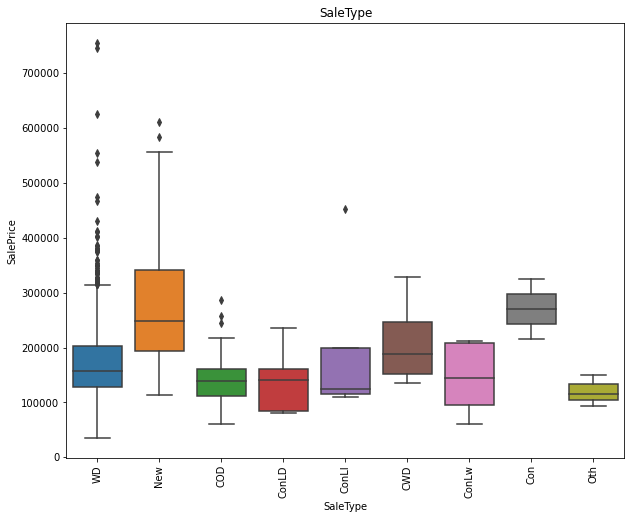

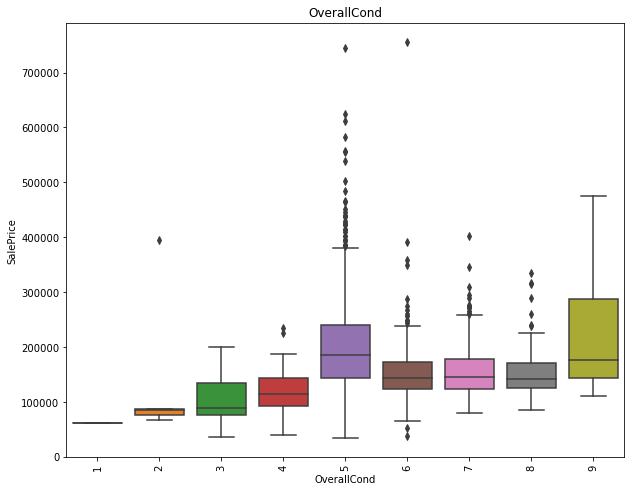

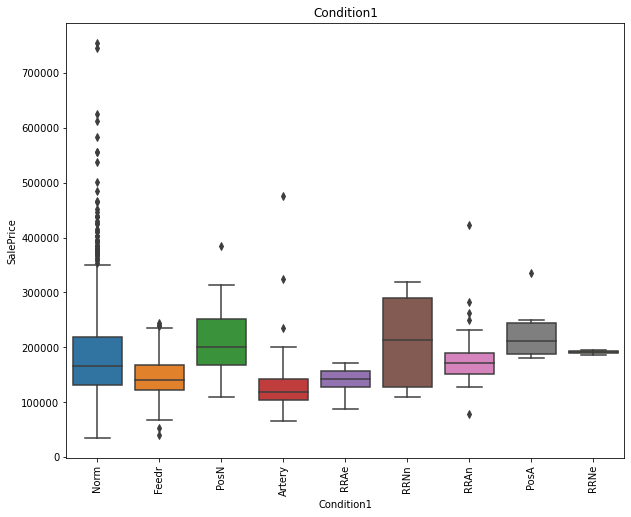

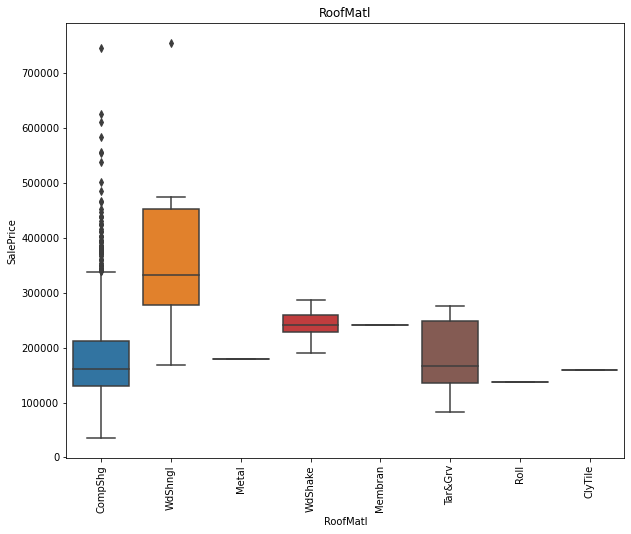

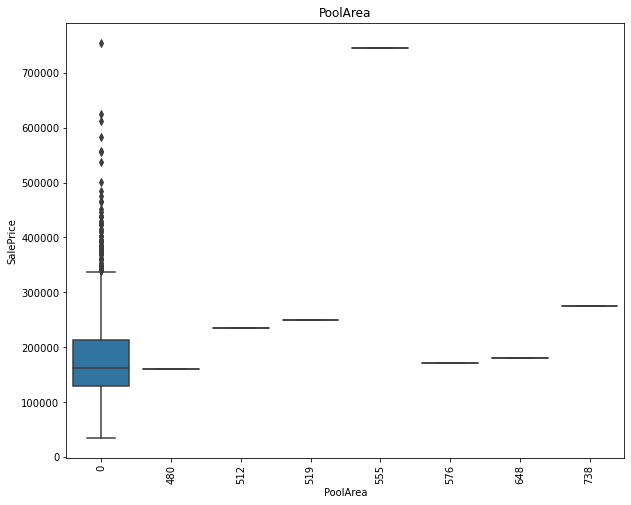

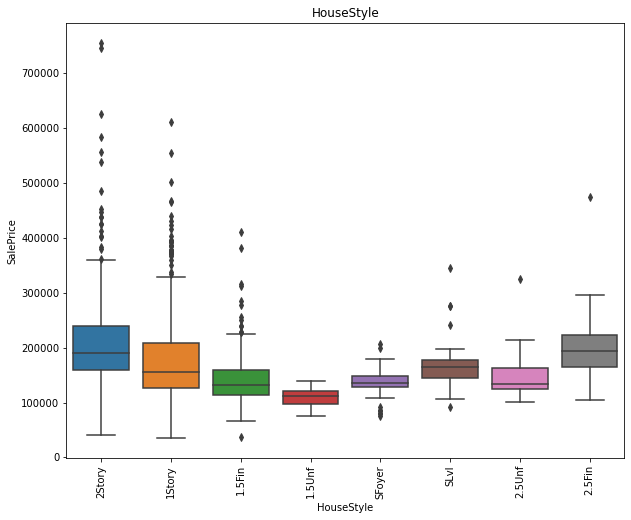

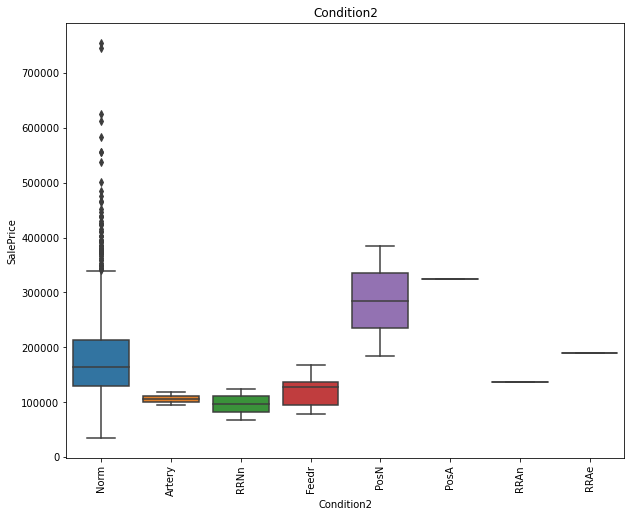

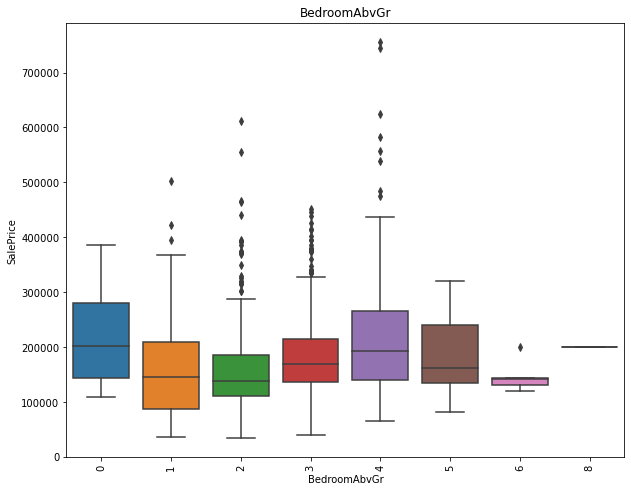

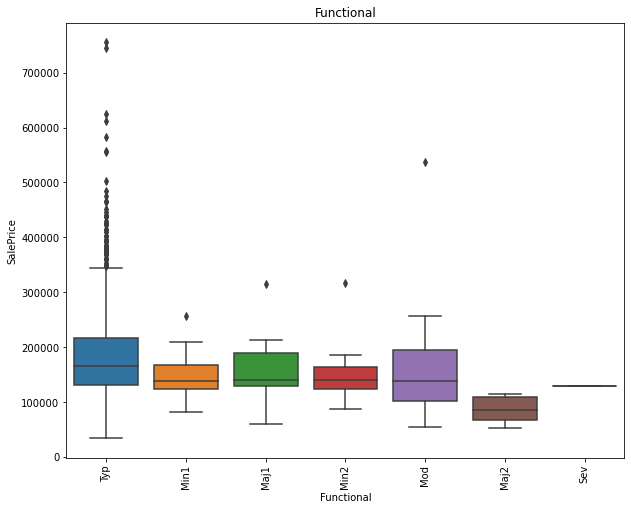

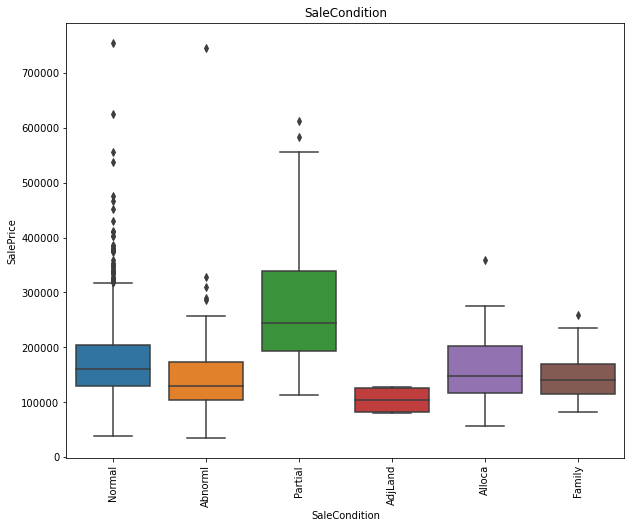

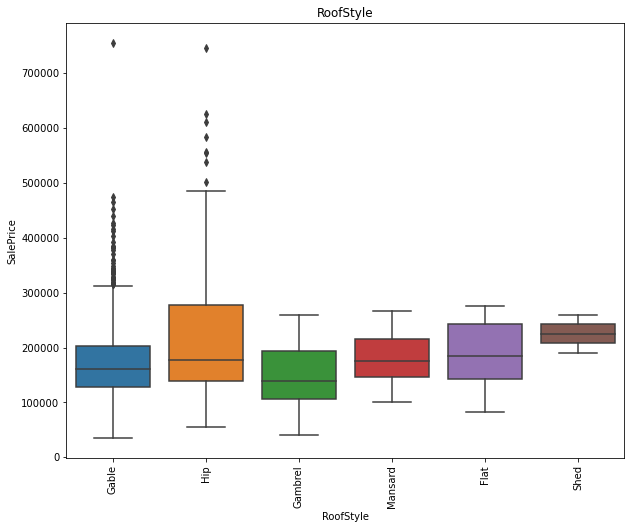

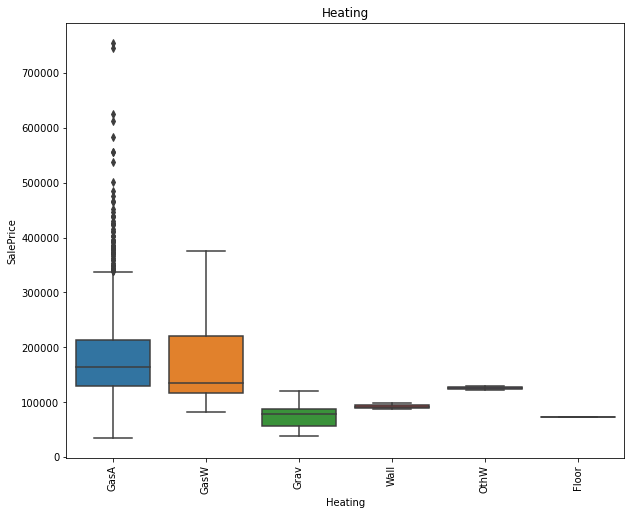

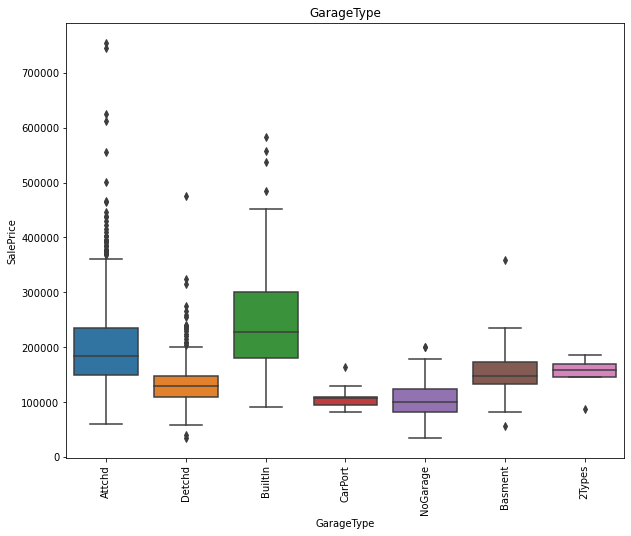

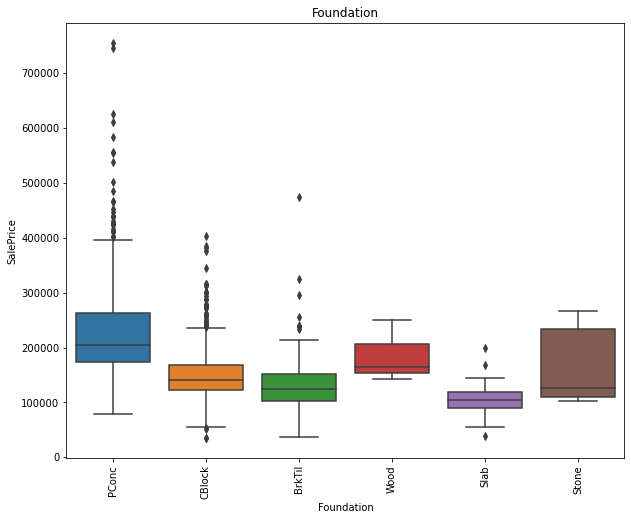

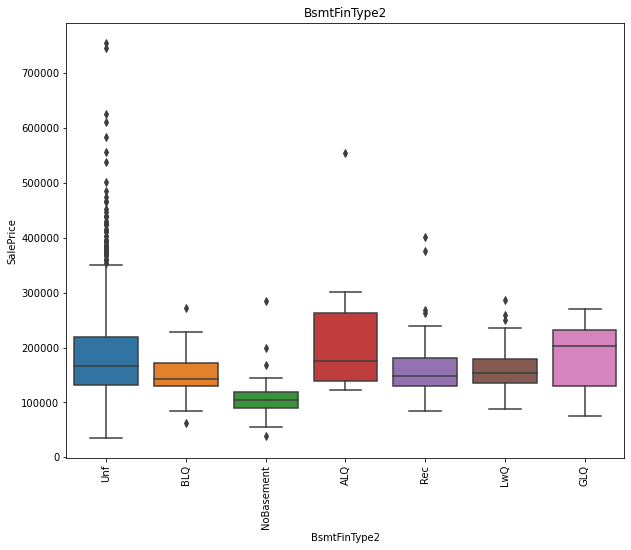

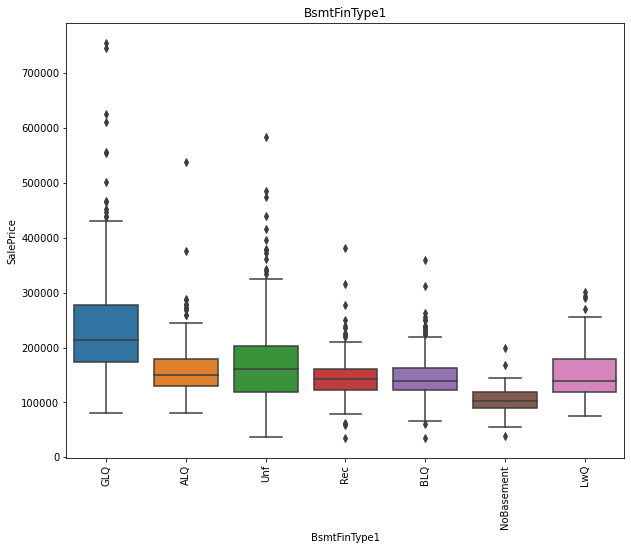

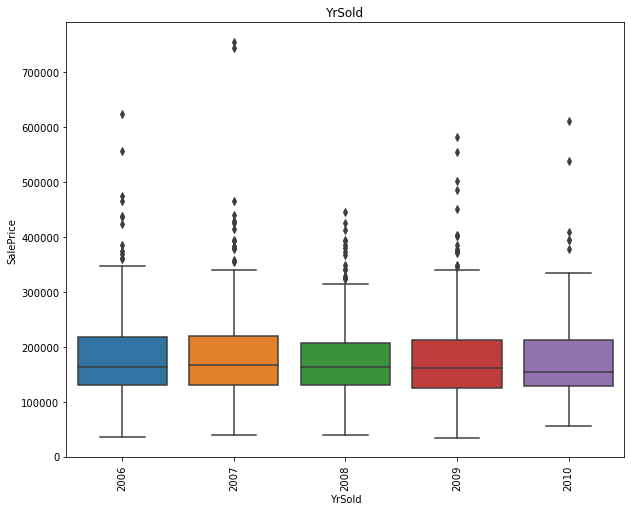

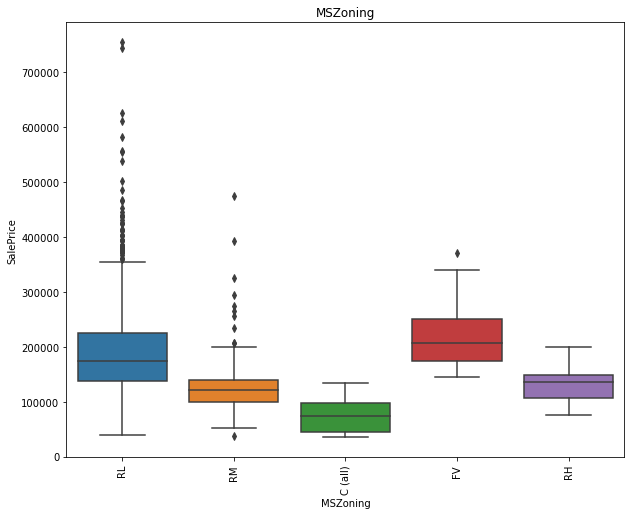

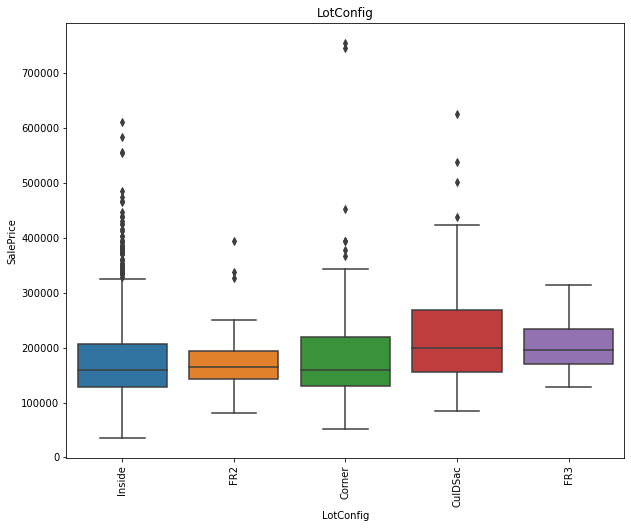

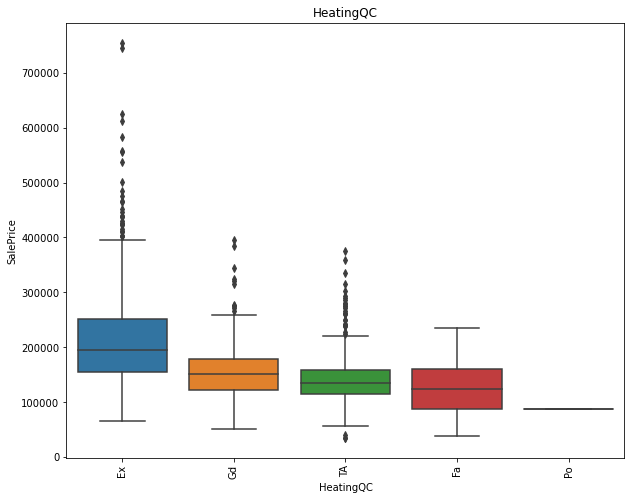

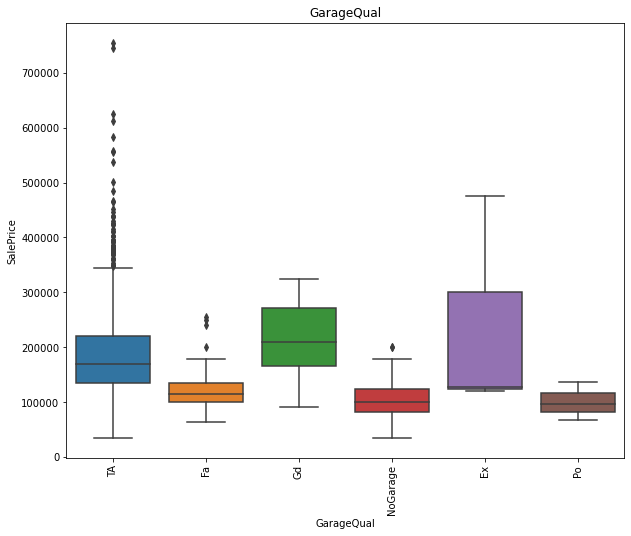

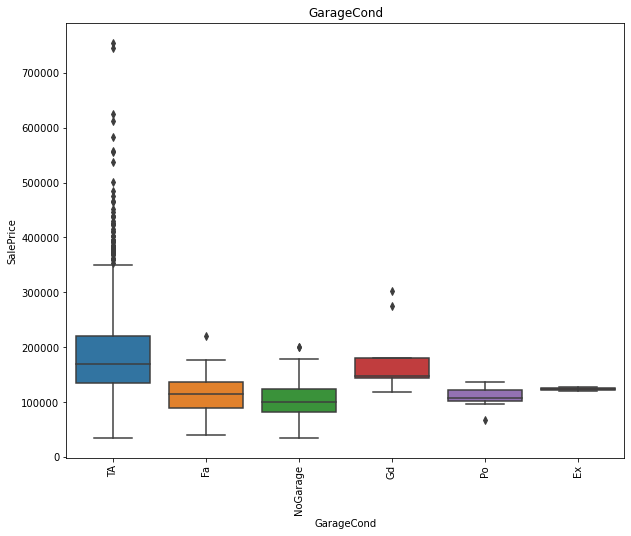

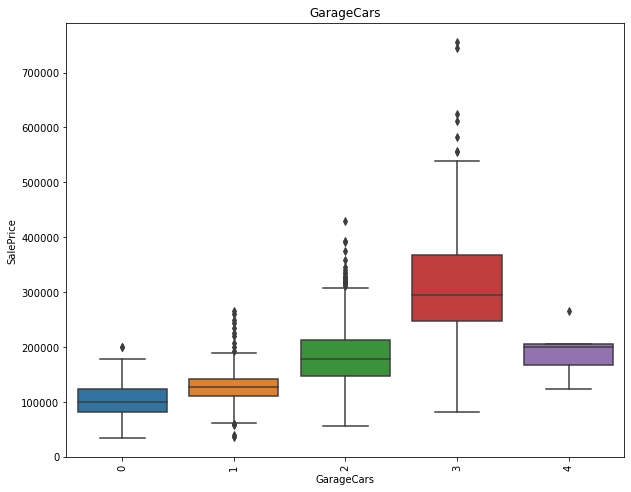

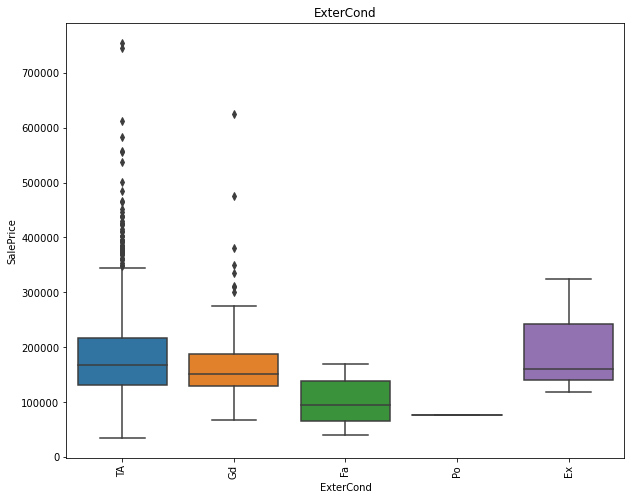

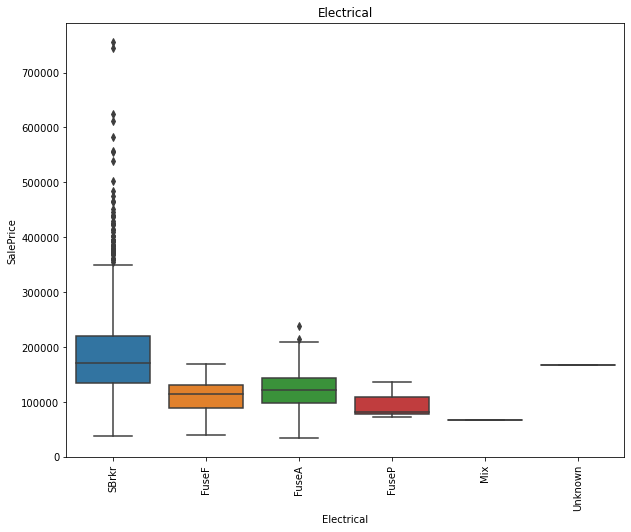

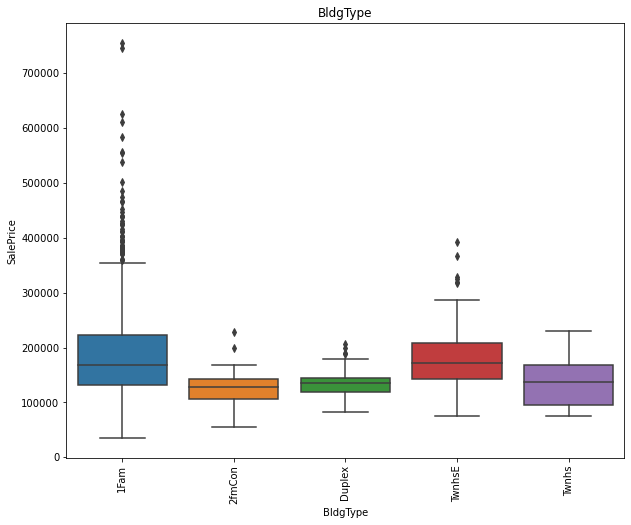

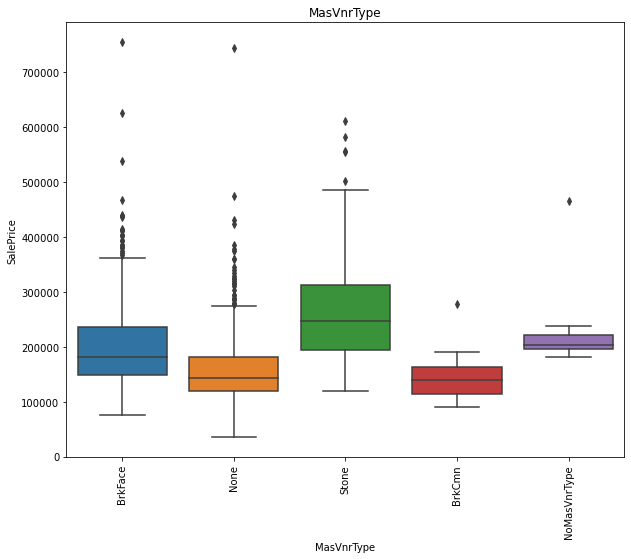

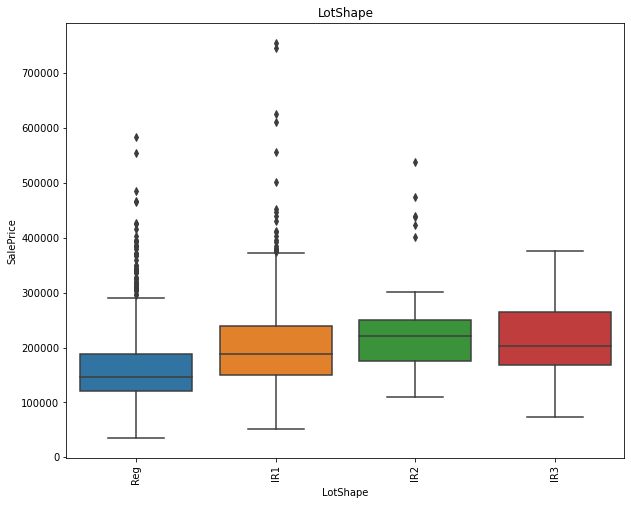

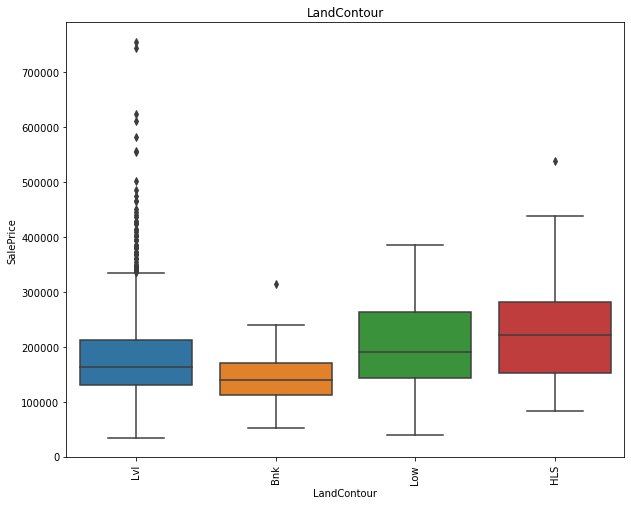

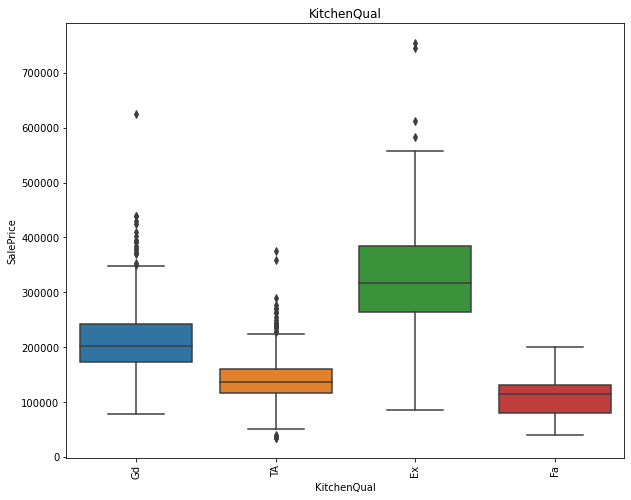

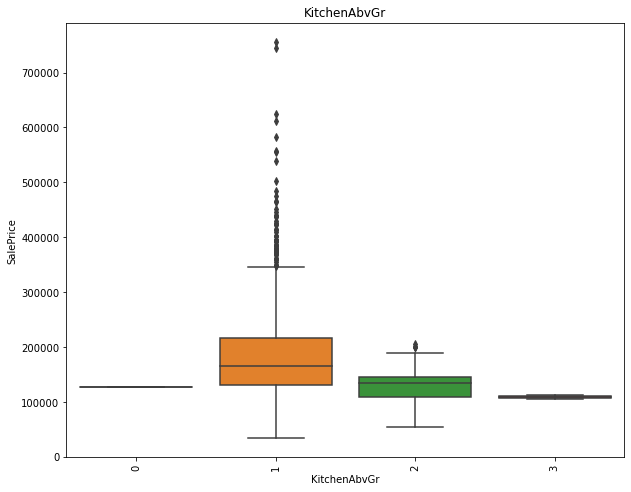

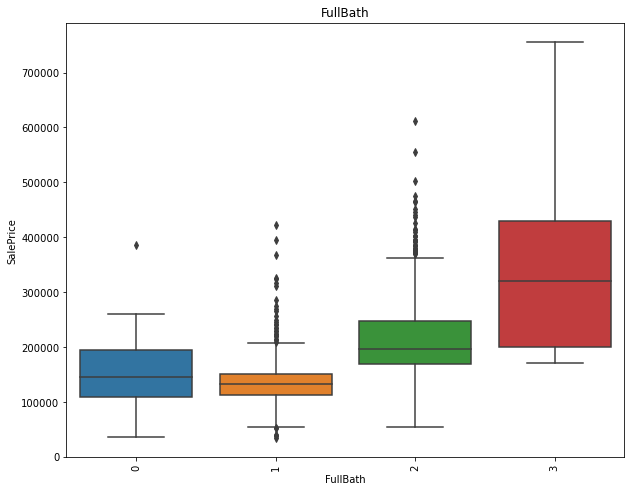

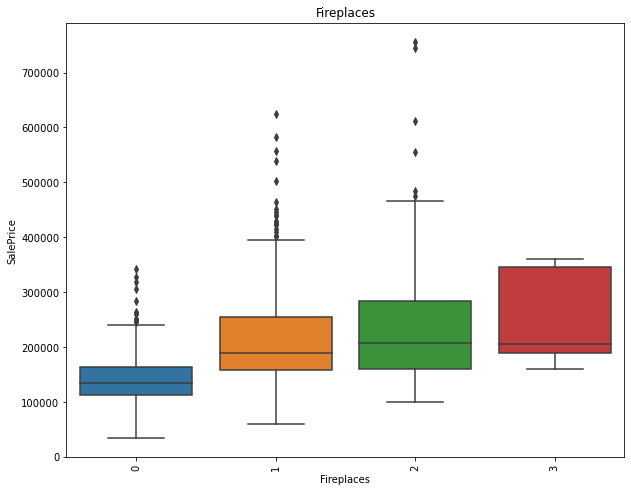

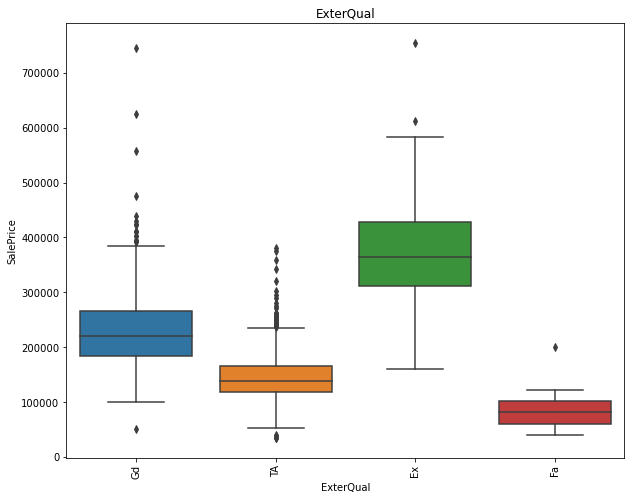

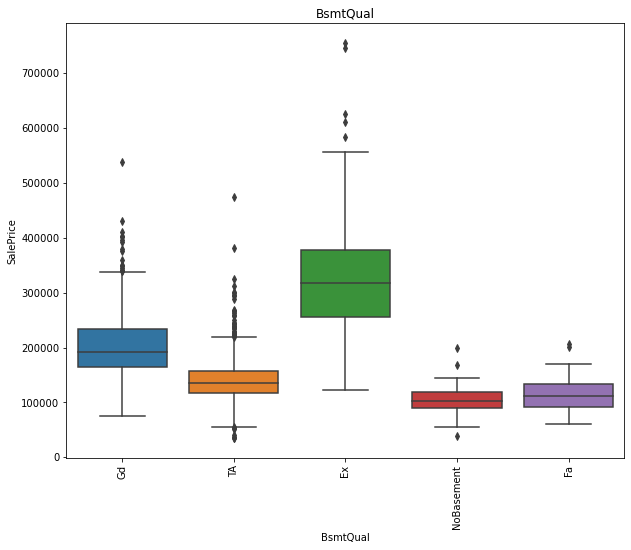

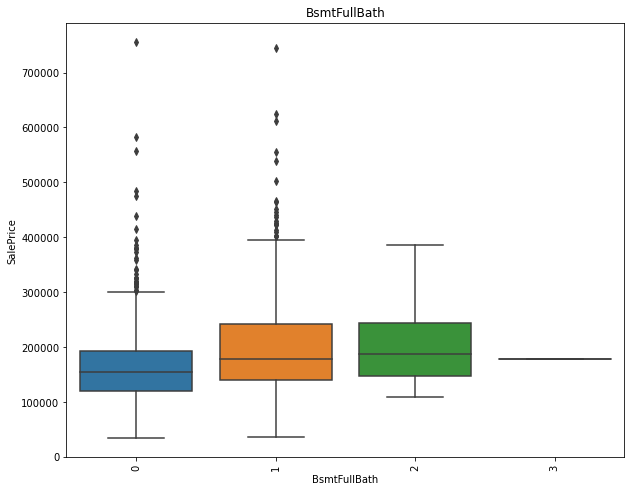

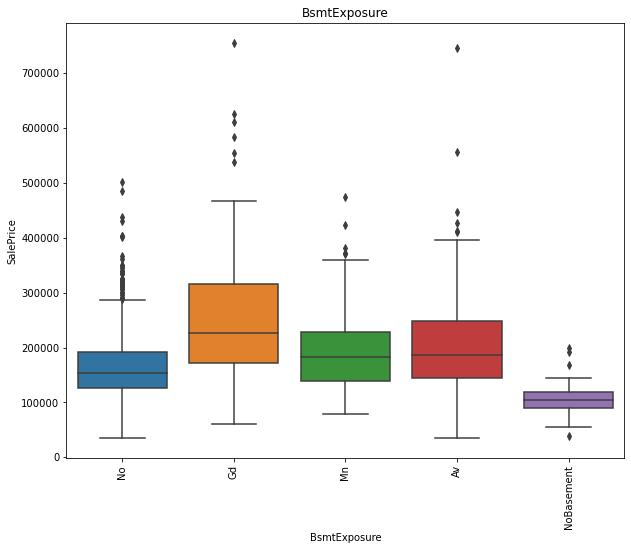

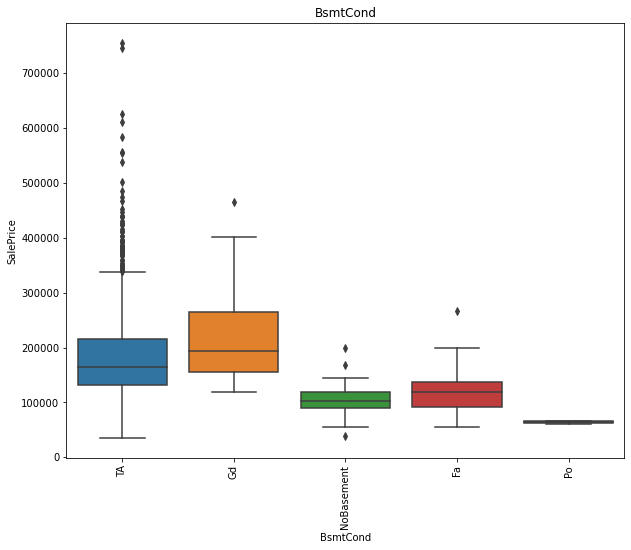

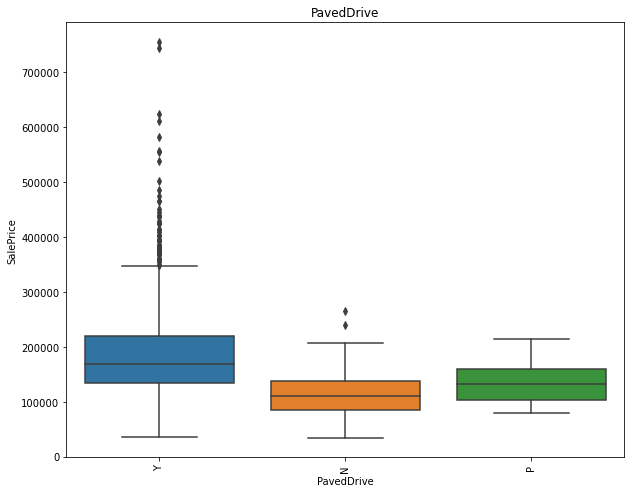

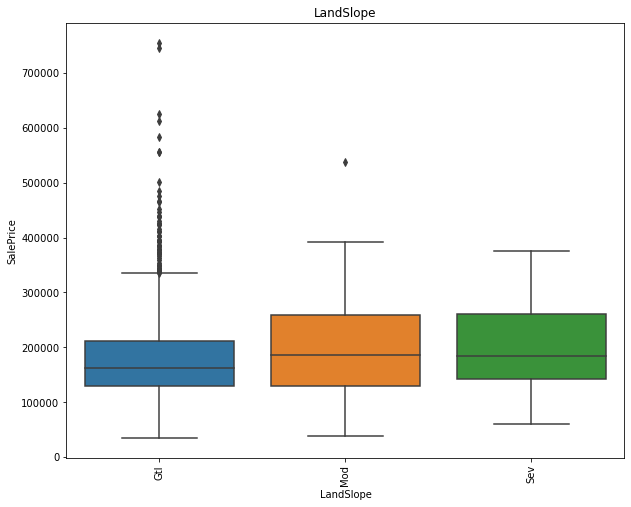

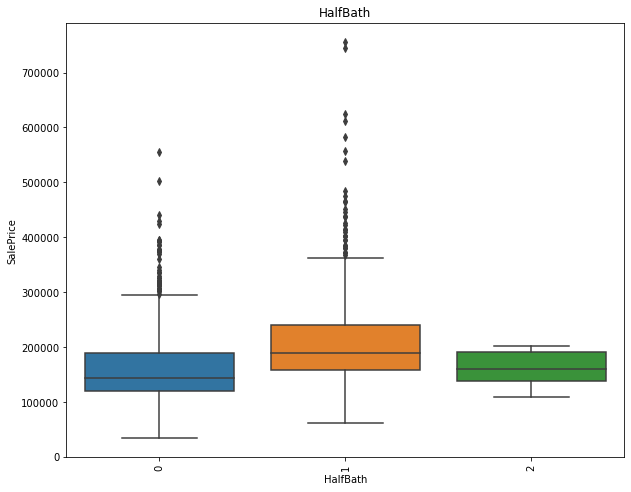

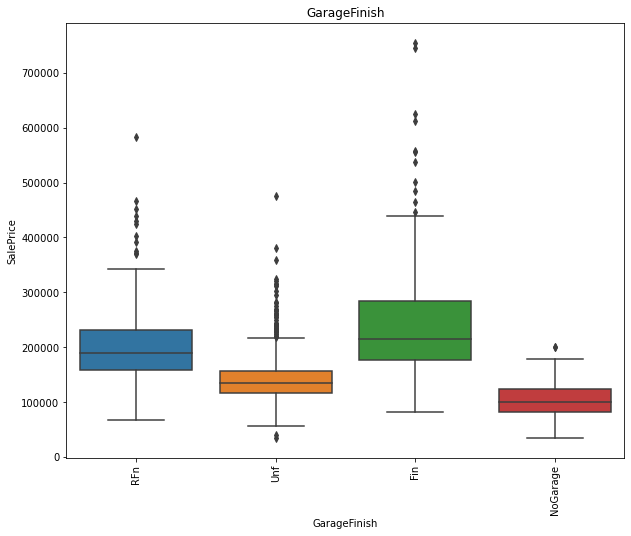

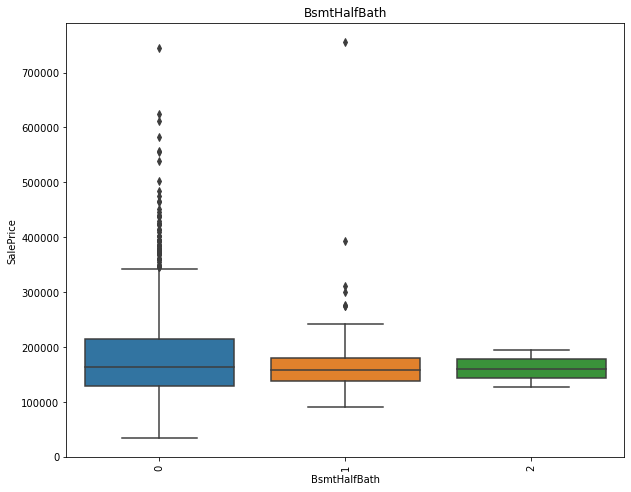

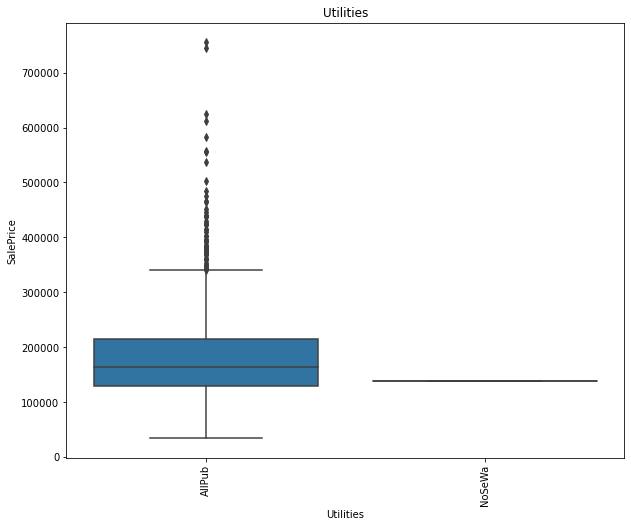

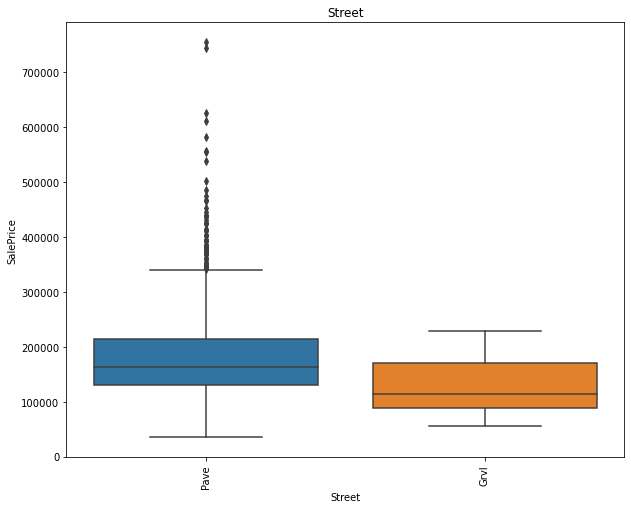

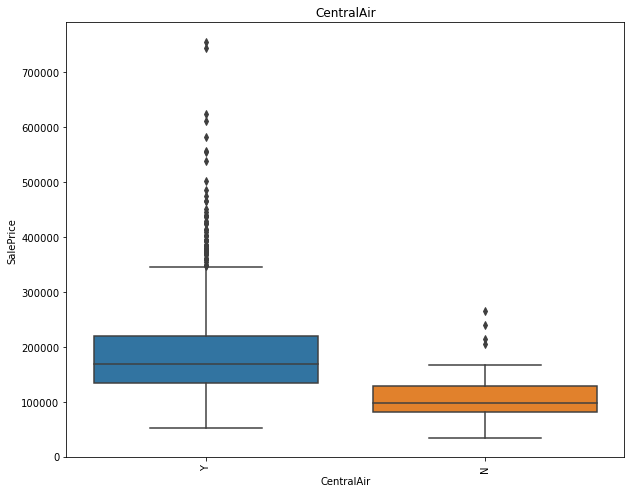

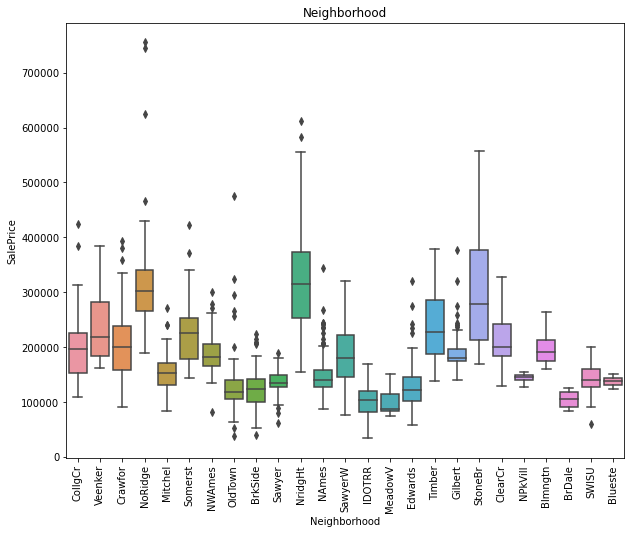

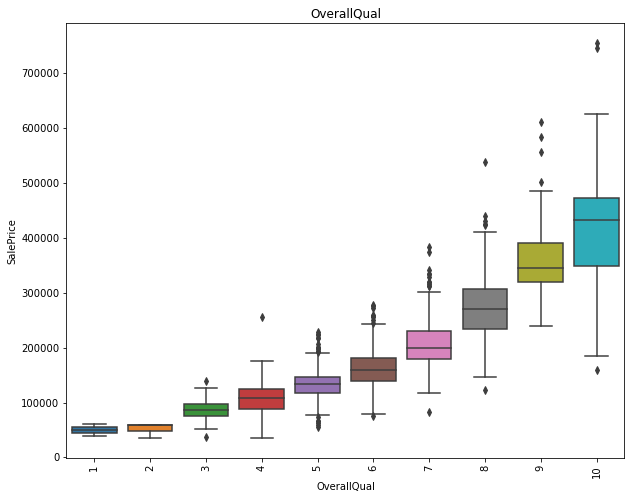

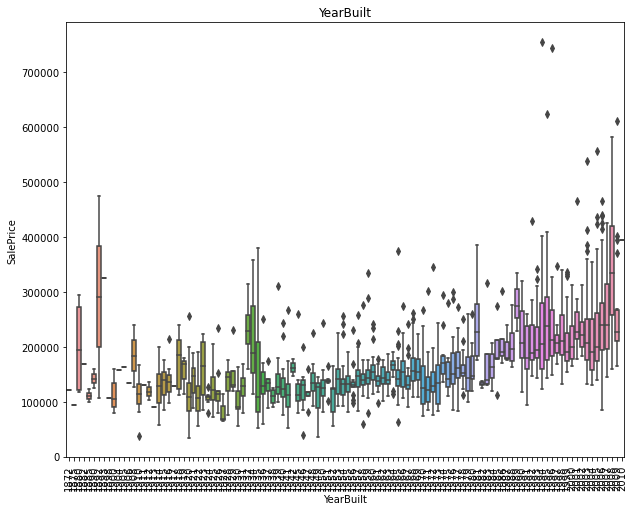

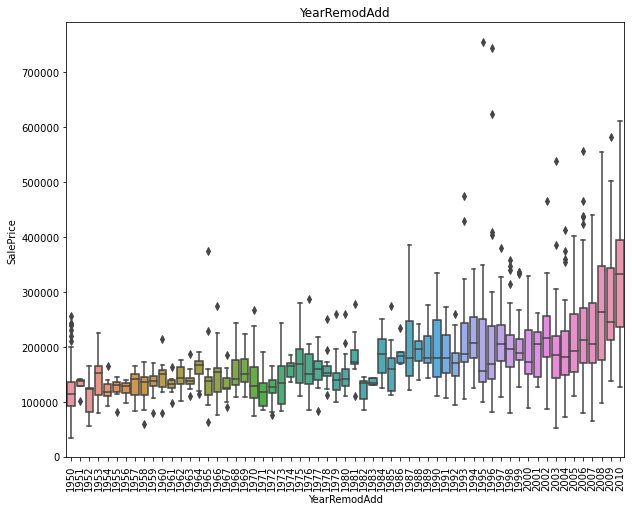

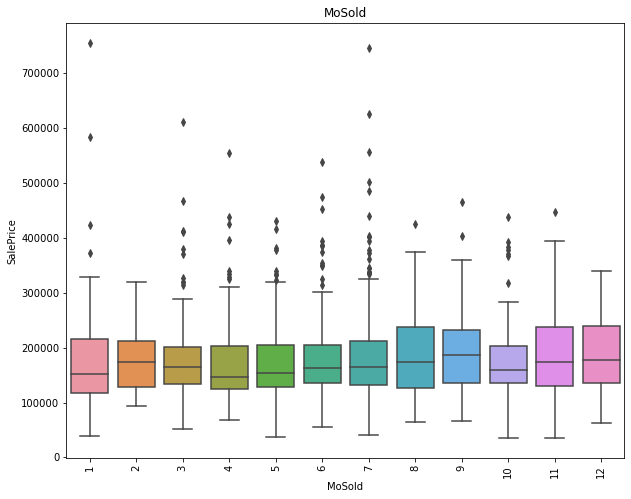

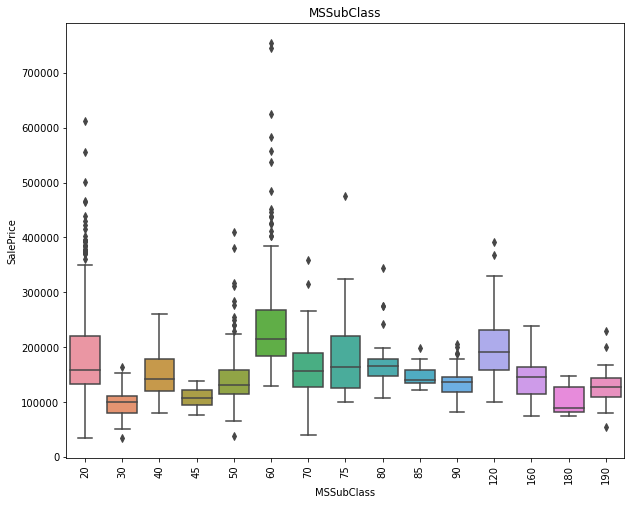

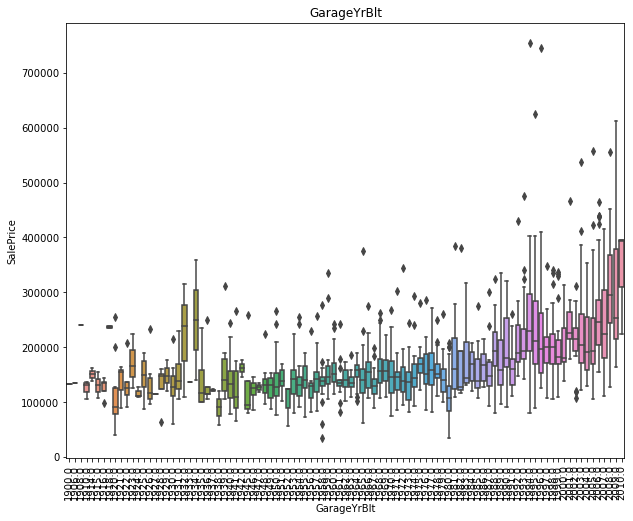

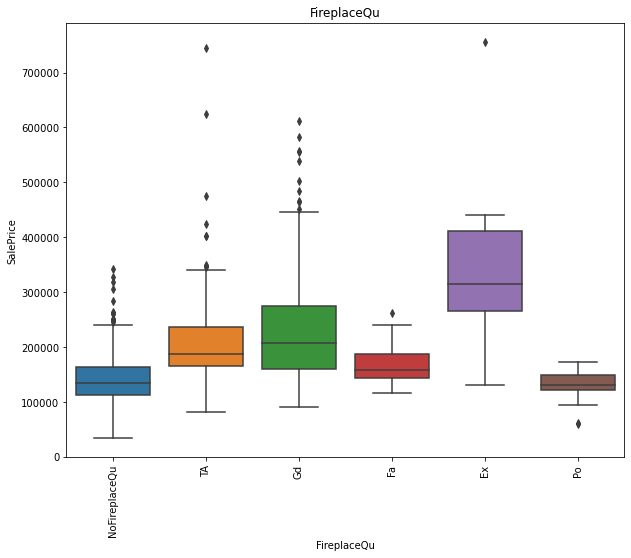

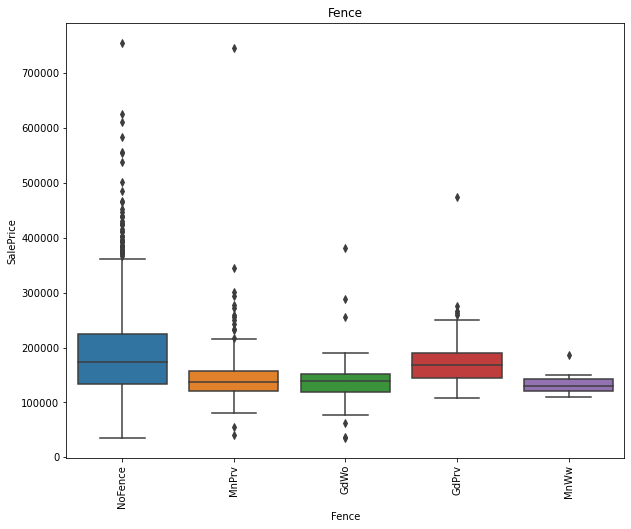

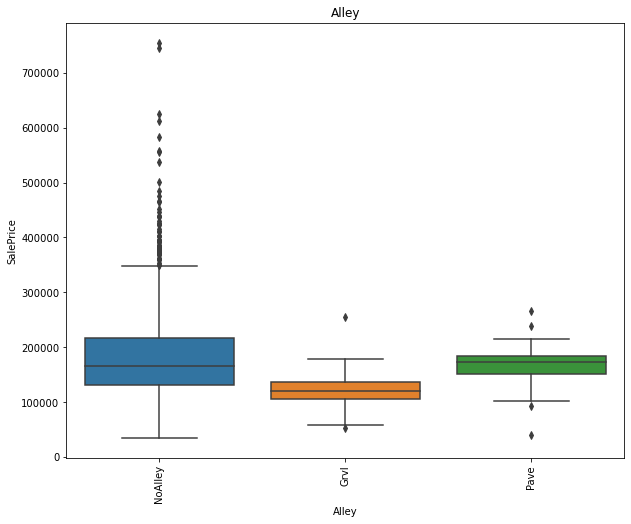

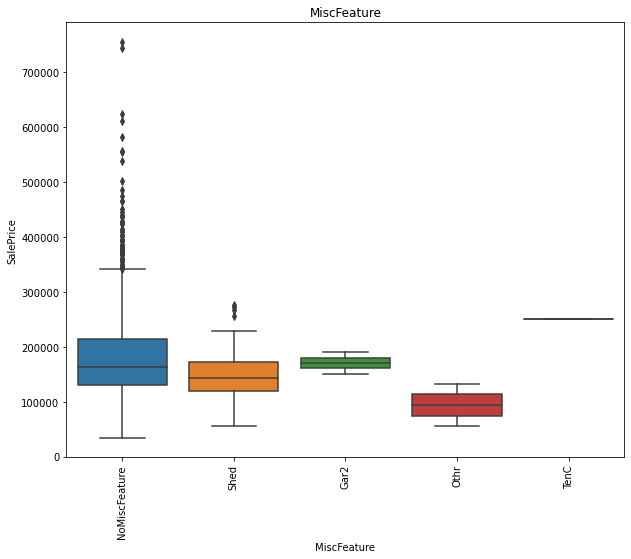

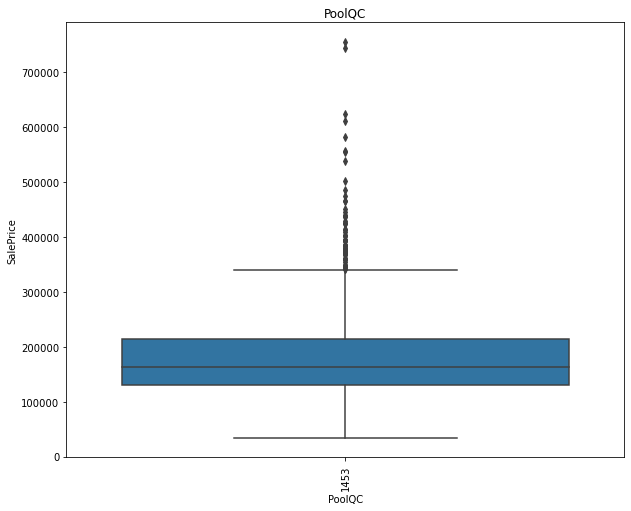

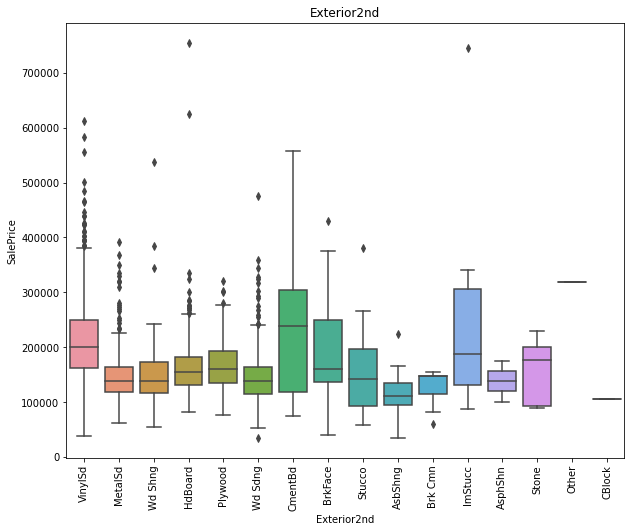

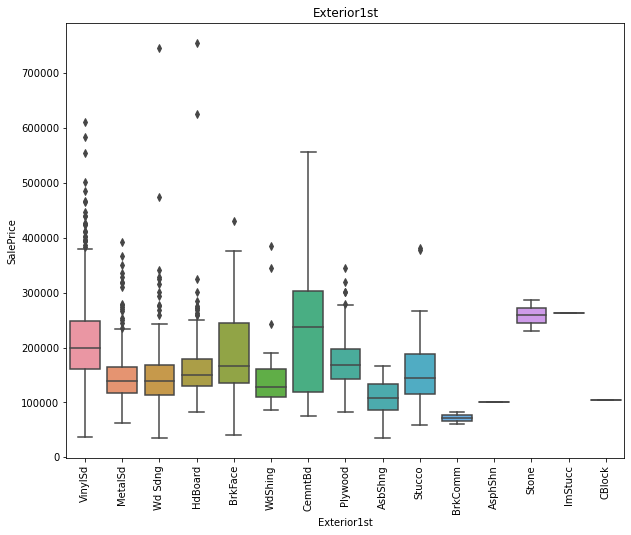

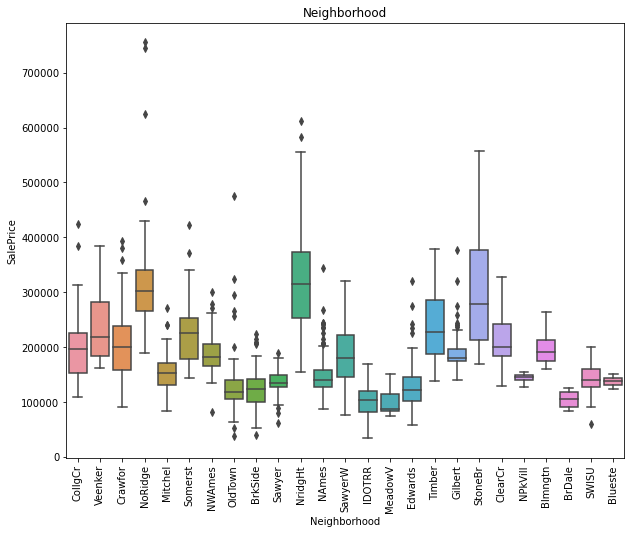

In [125]:

for i in list_catg_cols:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=i, y ="SalePrice" , data = df)
    plt.xticks(rotation=90)
    plt.title(i, fontsize=12)
    plt.show()

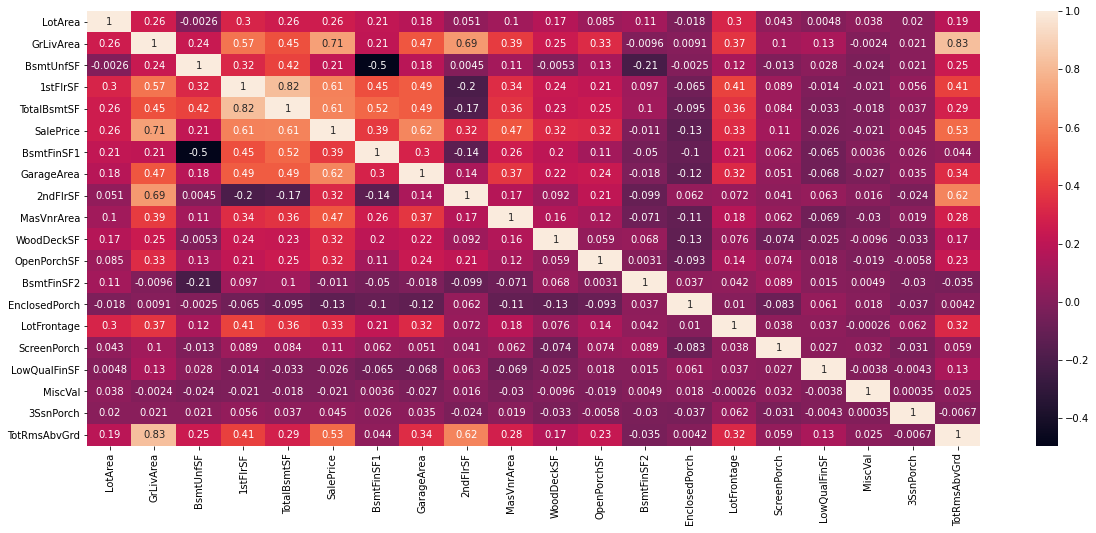

In [69]:
plt.figure(figsize=(20,8))
sns.heatmap(df[list_cont_cols].corr(),annot=True)
plt.show()

<Figure size 2880x1152 with 0 Axes>

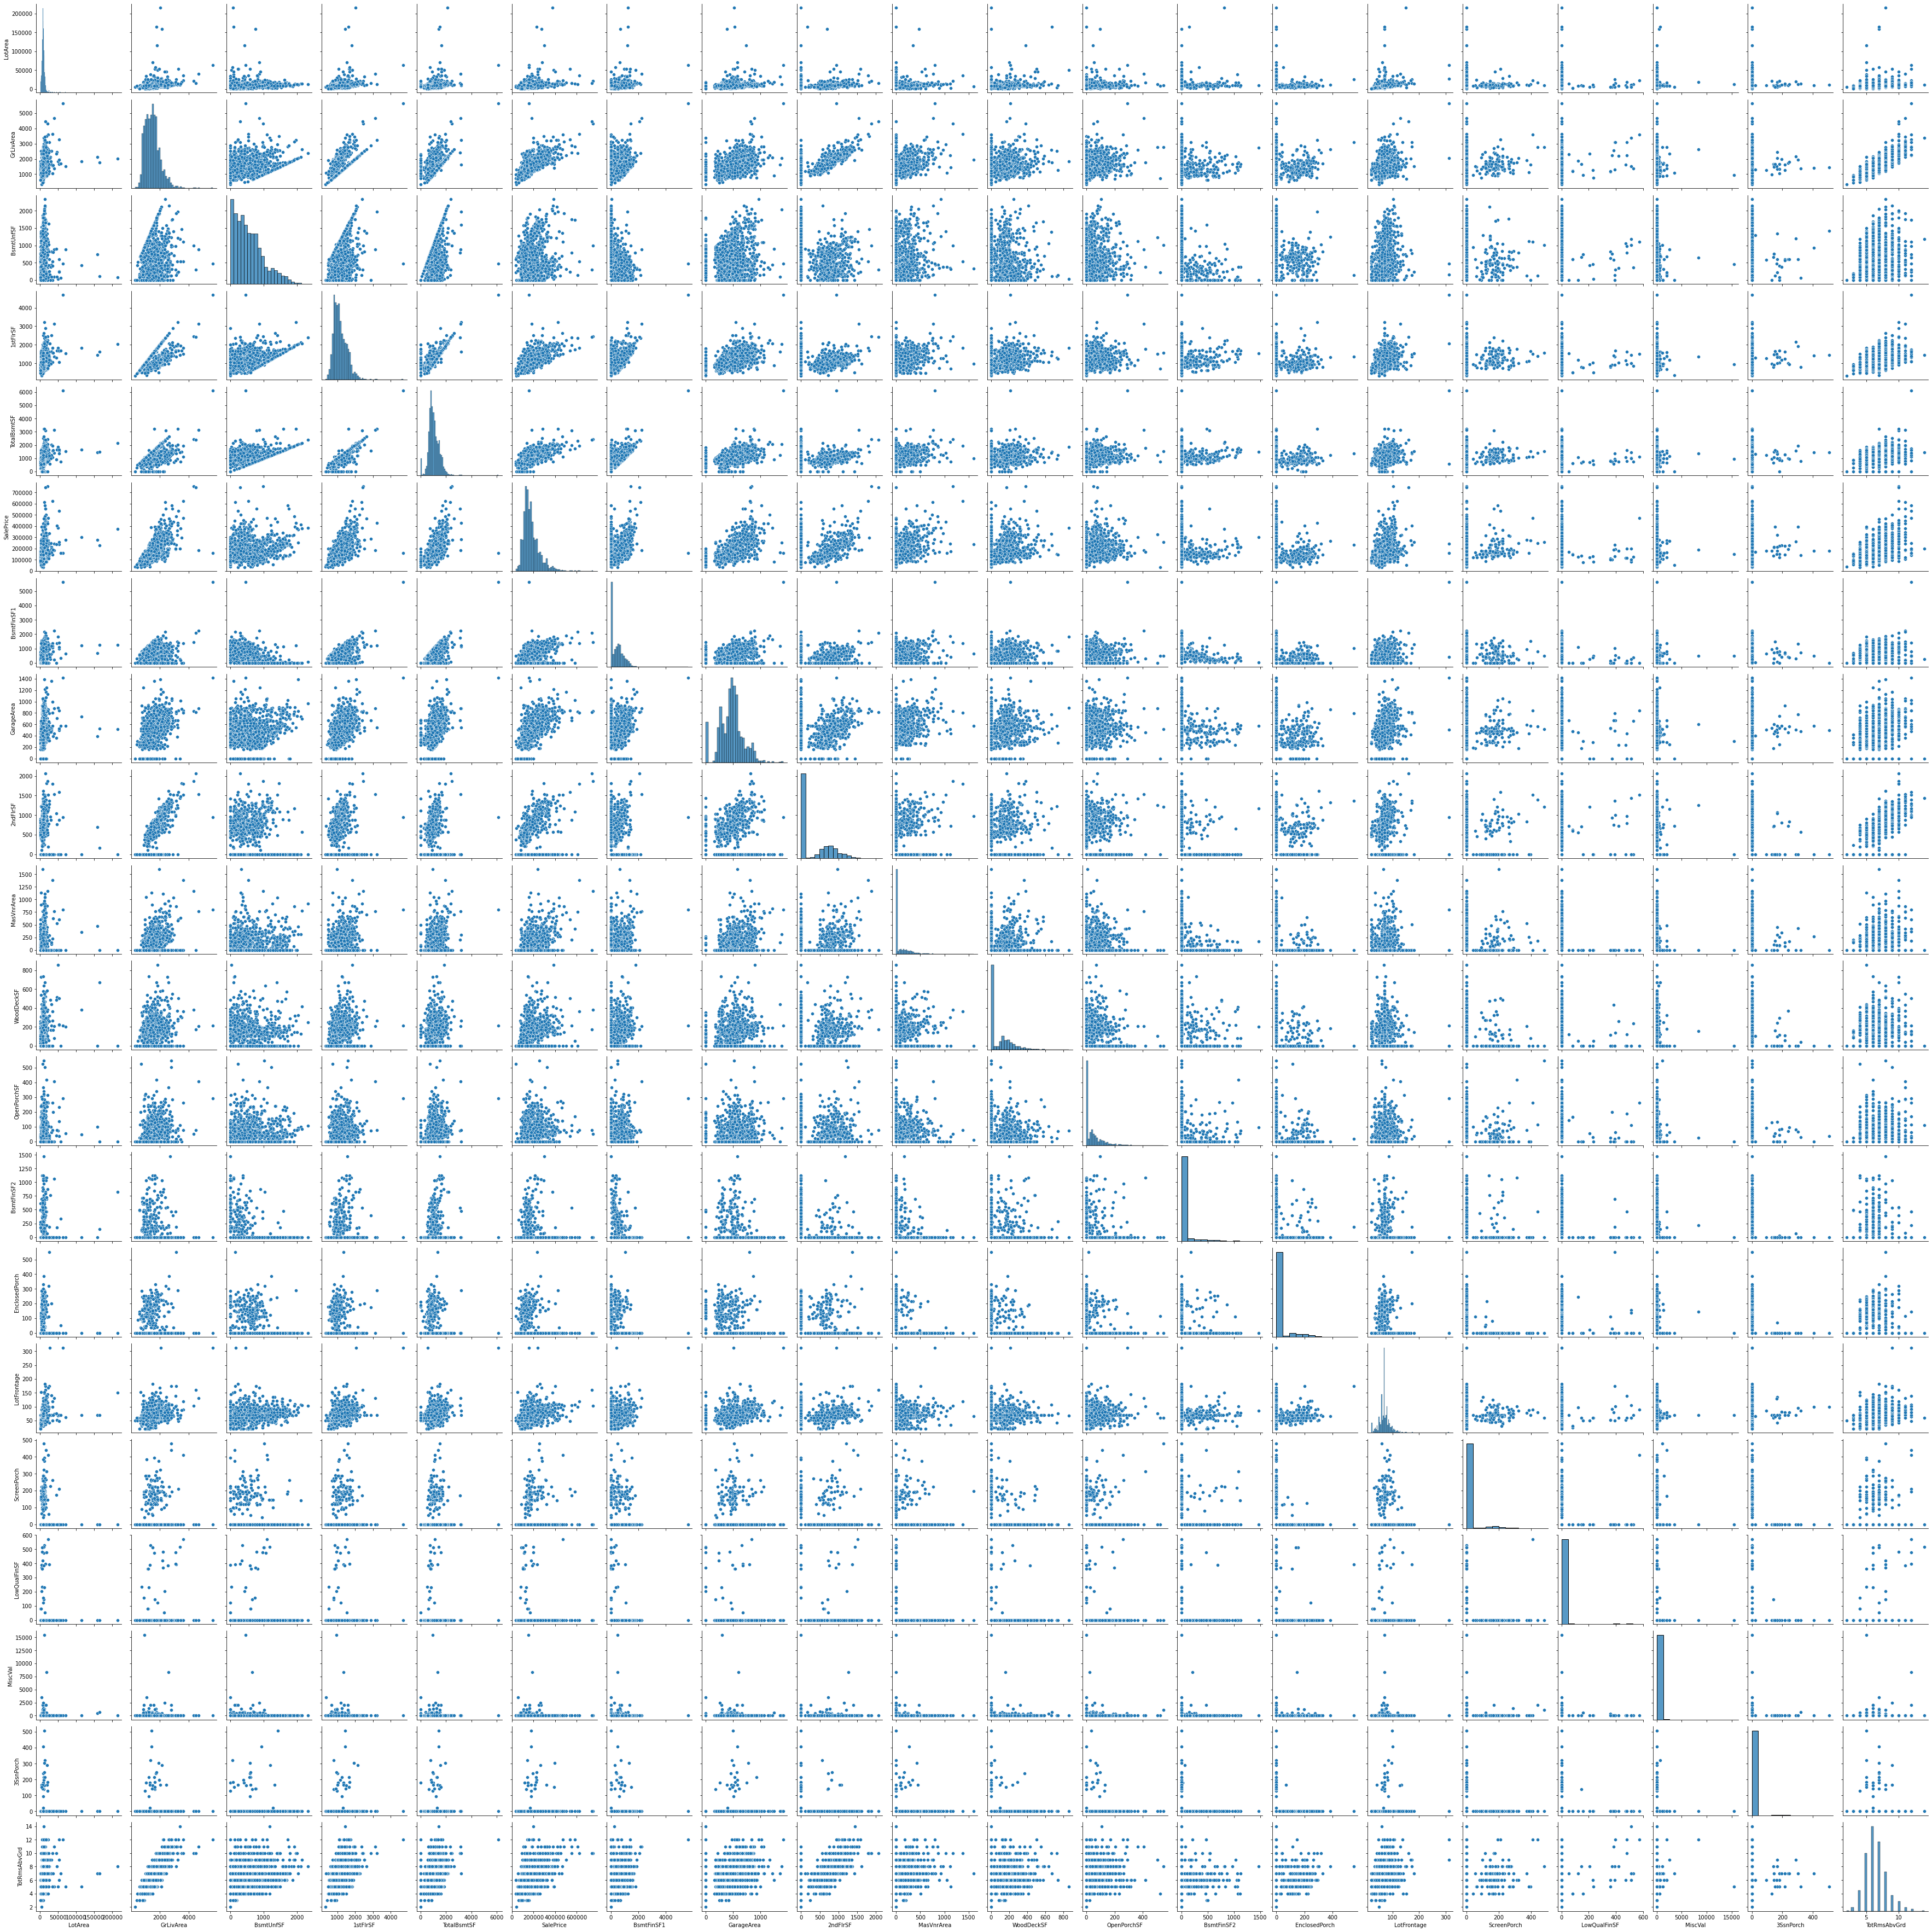

In [70]:
#plotting the continous columns to visualize the corelation 
plt.figure(figsize=(40,16))
sns.pairplot(df[list_cont_cols])
plt.show()

In [71]:
 #drop columns LotArea,BsmtFinSF1,BsmtFinSF2,'EnclosedPorch','LotFrontage',
                  #'ScreenPorch','LowQualFinSF','MiscVal','3SsnPorch','TotRmsAbvGrd'
list_cont_cols1 = ['GrLivArea','BsmtUnfSF','1stFlrSF','TotalBsmtSF','SalePrice','GarageArea','2ndFlrSF',
                  'MasVnrArea','WoodDeckSF','OpenPorchSF','BsmtFinSF2']


In [72]:
df = df.drop(columns= ['LotArea','BsmtFinSF1','EnclosedPorch','LotFrontage','ScreenPorch','LowQualFinSF','MiscVal','3SsnPorch','TotRmsAbvGrd'])

In [73]:
# Now we have replaced all missing values
df.shape

(1460, 71)

In [74]:
df_house = df

In [75]:
df_house.shape

(1460, 71)

In [76]:
#add dummy variables for weathersit,season
house_dummies = pd.get_dummies(df_house[['SaleType','OverallCond','Condition1','RoofMatl','PoolArea','HouseStyle',
                                         'Condition2','BedroomAbvGr','Functional','SaleCondition','RoofStyle',
                                         'Heating','GarageType','Foundation','BsmtFinType2','BsmtFinType1','YrSold',
                                         'MSZoning','LotConfig','HeatingQC','GarageQual','GarageCond','GarageCars',
                                         'ExterCond','Electrical','BldgType','MasVnrType','LotShape','LandContour',
                                         'KitchenQual','KitchenAbvGr','FullBath','Fireplaces','ExterQual','BsmtQual',
                                         'BsmtFullBath','BsmtExposure','BsmtCond','PavedDrive','LandSlope','HalfBath',
                                         'GarageFinish','BsmtHalfBath','Utilities','Street','CentralAir','Neighborhood',
                                         'OverallQual','YearBuilt','YearRemodAdd','MoSold','MSSubClass','GarageYrBlt',
                                         'FireplaceQu','Fence','Alley','MiscFeature','PoolQC','Exterior2nd','Exterior1st']],drop_first = True)
df_houserate = pd.concat([df_house,house_dummies],axis = 1)

In [77]:
df_houserate.shape

(1460, 311)

In [78]:
df_houserate = df_houserate.drop(columns=['SaleType','OverallCond','Condition1','RoofMatl','PoolArea','HouseStyle',
                                         'Condition2','BedroomAbvGr','Functional','SaleCondition','RoofStyle',
                                         'Heating','GarageType','Foundation','BsmtFinType2','BsmtFinType1','YrSold',
                                         'MSZoning','LotConfig','HeatingQC','GarageQual','GarageCond','GarageCars',
                                         'ExterCond','Electrical','BldgType','MasVnrType','LotShape','LandContour',
                                         'KitchenQual','KitchenAbvGr','FullBath','Fireplaces','ExterQual','BsmtQual',
                                         'BsmtFullBath','BsmtExposure','BsmtCond','PavedDrive','LandSlope','HalfBath',
                                         'GarageFinish','BsmtHalfBath','Utilities','Street','CentralAir','Neighborhood',
                                         'OverallQual','YearBuilt','YearRemodAdd','MoSold','MSSubClass','GarageYrBlt',
                                         'FireplaceQu','Fence','Alley','MiscFeature','PoolQC','Exterior2nd','Exterior1st'])

In [79]:
df_houserate.head()

MasVnrArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       196.0           0        150          856       856       854   
1         0.0           0        284         1262      1262         0   
2       162.0           0        434          920       920       866   
3         0.0           0        540          756       961       756   
4       350.0           0        490         1145      1145      1053   

   GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  ...  Exterior1st_CemntBd  \
0       1710         548           0           61  ...                    0   
1       1262         460         298            0  ...                    0   
2       1786         608           0           42  ...                    0   
3       1717         642           0           35  ...                    0   
4       2198         836         192           84  ...                    0   

   Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  
0                    1                    0                    0  
1                    0                    0                    0  
2                    1                    0                    0  
3                    0                    1                    0  
4                    1                    0                    0  

[5 rows x 233 columns]

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
scaler = MinMaxScaler()

In [83]:
np.random.seed(0)
df_train, df_test = train_test_split(df_houserate, train_size = 0.7, test_size = 0.3, random_state = 100)

In [84]:
# apply the transform on numeric vars
#df_train.columns

In [85]:
df_train[list_cont_cols1] = scaler.fit_transform(df_train[list_cont_cols1])
#df_train[list_cont_cols] = scaler.fit_transform(df_train[list_cont_cols])

In [86]:
df_train.head()

MasVnrArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210         0.00         0.0   0.169521     0.141408  0.113889  0.000000   
318         0.16         0.0   0.154110     0.220458  0.231481  0.616949   
239         0.00         0.0   0.274401     0.120295  0.098611  0.333656   
986         0.00         0.0   0.207620     0.079378  0.145602  0.307022   
1416        0.00         0.0   0.332620     0.127169  0.202315  0.505569   

      GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  ...  \
210    0.081860    0.000000    0.000000     0.000000  ...   
318    0.424289    0.462623    0.396733     0.114723  ...   
239    0.201576    0.155148    0.000000     0.267686  ...   
986    0.230015    0.179831    0.459743     0.000000  ...   
1416   0.355880    0.394922    0.000000     0.000000  ...   

      Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
210                     0                    0                    0   
318                     0                    1                    0   
239                     0                    0                    0   
986                     0                    0                    0   
1416                    0                    0                    0   

      Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
210                     0                    0                  0   
318                     0                    0                  0   
239                     0                    0                  0   
986                     0                    0                  0   
1416                    0                    0                  0   

      Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
210                    1                    0                    0   
318                    0                    0                    0   
239                    0                    1                    0   
986                    0                    1                    0   
1416                   0                    1                    0   

      Exterior1st_WdShing  
210                     0  
318                     0  
239                     0  
986                     0  
1416                    0  

[5 rows x 233 columns]

In [87]:
df_train.info

<bound method DataFrame.info of       MasVnrArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210      0.00000         0.0   0.169521     0.141408  0.113889  0.000000   
318      0.16000         0.0   0.154110     0.220458  0.231481  0.616949   
239      0.00000         0.0   0.274401     0.120295  0.098611  0.333656   
986      0.00000         0.0   0.207620     0.079378  0.145602  0.307022   
1416     0.00000         0.0   0.332620     0.127169  0.202315  0.505569   
...          ...         ...        ...          ...       ...       ...   
1009     0.00000         0.0   0.431507     0.164975  0.147222  0.000000   
802      0.00000         0.0   0.034247     0.119149  0.082407  0.352542   
53       0.00000         0.0   0.013699     0.301473  0.340278  0.000000   
350      0.22625         0.0   0.800086     0.305892  0.346528  0.000000   
79       0.00000         0.0   0.188356     0.072013  0.071759  0.265375   

      GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  .

In [88]:
df_train.describe()

MasVnrArea   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.065306     0.033980     0.241388     0.173773     0.184341   
std       0.117088     0.115907     0.192066     0.075145     0.092132   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.092466     0.129787     0.116435   
50%       0.000000     0.000000     0.197774     0.162357     0.165278   
75%       0.098750     0.000000     0.345034     0.215057     0.243056   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          2ndFlrSF    GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  ...  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  ...   
mean      0.165943     0.207345     0.332545     0.107894     0.089690  ...   
std       0.210799     0.102232     0.150018     0.145254     0.126502  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.133743     0.231312     0.000000     0.000000  ...   
50%       0.000000     0.197540     0.338505     0.000000     0.047801  ...   
75%       0.352058     0.255573     0.406206     0.196033     0.133843  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
count          1021.000000          1021.000000          1021.000000   
mean              0.036239             0.154750             0.000979   
std               0.186976             0.361844             0.031296   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
count          1021.000000          1021.000000        1021.000000   
mean              0.167483             0.073457           0.001959   
std               0.373589             0.261014           0.044237   
min               0.000000             0.000000           0.000000   
25%               0.000000             0.000000           0.000000   
50%               0.000000             0.000000           0.000000   
75%               0.000000             0.000000           0.000000   
max               1.000000             1.000000           1.000000   

       Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
count         1021.000000          1021.000000          1021.000000   
mean             0.020568             0.340842             0.136141   
std              0.142003             0.474225             0.343106   
min              0.000000             0.000000             0.000000   
25%              0.000000             0.000000             0.000000   
50%              0.000000             0.000000             0.000000   
75%              0.000000             1.000000             0.000000   
max              1.000000             1.000000             1.000000   

       Exterior1st_WdShing  
count          1021.000000  
mean              0.019589  
std               0.138650  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               1.000000  

[8 rows x 233 columns]

In [89]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [90]:
df_test[list_cont_cols1] = scaler.transform(df_test[list_cont_cols1])

In [91]:
df_test

MasVnrArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1436     0.00000    0.000000   0.106164     0.141408  0.113889  0.000000   
57       0.00000    0.000000   0.368151     0.140753  0.112963  0.416465   
780      0.02375    0.000000   0.529538     0.202455  0.203935  0.000000   
382      0.00000    0.000000   0.401969     0.153682  0.131250  0.415496   
1170     0.00000    0.000000   0.245719     0.179378  0.172685  0.000000   
...          ...         ...        ...          ...       ...       ...   
509      0.08250    0.000000   0.021404     0.170376  0.154861  0.000000   
555      0.00000    0.000000   0.425086     0.162520  0.156481  0.000000   
399      0.06250    0.000000   0.119863     0.178723  0.171296  0.212107   
545      0.11125    0.137042   0.000000     0.197054  0.232639  0.390315   
266      0.00000    0.000000   0.037671     0.131260  0.099537  0.343341   

      GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  ...  \
1436   0.081860    0.372355    0.000000     0.000000  ...   
57     0.246349    0.398449    0.000000     0.133843  ...   
780    0.156610    0.283498    0.256709     0.040153  ...   
382    0.261145    0.450635    0.168028     0.101338  ...   
1170   0.130669    0.252468    0.236873     0.000000  ...   
...         ...         ...         ...          ...  ...   
509    0.115872    0.190409    0.261377     0.168260  ...   
555    0.117218    0.197461    0.000000     0.000000  ...   
399    0.213682    0.308886    0.000000     0.321224  ...   
545    0.335319    0.554302    0.000000     0.000000  ...   
266    0.206188    0.291255    0.110852     0.143403  ...   

      Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
1436                    0                    1                    0   
57                      0                    0                    0   
780                     0                    1                    0   
382                     0                    0                    0   
1170                    0                    0                    0   
...                   ...                  ...                  ...   
509                     0                    0                    0   
555                     0                    0                    0   
399                     1                    0                    0   
545                     0                    1                    0   
266                     0                    0                    0   

      Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
1436                    0                    0                  0   
57                      0                    0                  0   
780                     0                    0                  0   
382                     0                    0                  0   
1170                    0                    1                  0   
...                   ...                  ...                ...   
509                     1                    0                  0   
555                     1                    0                  0   
399                     0                    0                  0   
545                     0                    0                  0   
266                     0                    0                  0   

      Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
1436                   0                    0                    0   
57                     0                    1                    0   
780                    0                    0                    0   
382                    0                    1                    0   
1170                   0                    0                    0   
...                  ...                  ...                  ...   
509                    0                    0                    0   
555                    0                    0                    0   
399                    0                    0   

In [92]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
##df_lin_model.shape
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [95]:
pd.options.display.max_rows = 250
vif

Features      VIF
107              GarageQual_TA      inf
206         Exterior2nd_CBlock      inf
108              GarageCond_Fa      inf
109              GarageCond_Gd      inf
88     BsmtFinType1_NoBasement      inf
110        GarageCond_NoGarage      inf
111              GarageCond_Po      inf
106              GarageQual_Po      inf
112              GarageCond_TA      inf
218        Exterior1st_AsphShn      inf
105        GarageQual_NoGarage      inf
15                SaleType_New      inf
221         Exterior1st_CBlock      inf
73         GarageType_NoGarage      inf
103              GarageQual_Fa      inf
158      GarageFinish_NoGarage      inf
104              GarageQual_Gd      inf
151        BsmtCond_NoBasement      inf
144        BsmtQual_NoBasement      inf
57       SaleCondition_Partial      inf
203        Exterior2nd_AsphShn      inf
26            RoofMatl_CompShg  1689.41
6                    GrLivArea  1252.75
63                Heating_GasA  1185.77
199  MiscFeature_NoMiscFeature   986.09
116               ExterCond_TA   875.77
41             Condition2_Norm   791.27
4                     1stFlrSF   748.30
58             RoofStyle_Gable   595.65
162                Street_Pave   456.73
68           GarageType_Attchd   304.24
5                     2ndFlrSF   255.33
93                 MSZoning_RL   220.16
229        Exterior1st_VinylSd   181.70
215        Exterior2nd_VinylSd   180.70
52              Functional_Typ   166.74
72           GarageType_Detchd   140.72
60               RoofStyle_Hip   140.18
84            BsmtFinType2_Unf   127.47
210        Exterior2nd_MetalSd   116.21
225        Exterior1st_MetalSd   115.67
114               ExterCond_Gd   105.98
3                  TotalBsmtSF    93.31
128            MasVnrType_None    85.83
223        Exterior1st_HdBoard    83.50
208        Exterior2nd_HdBoard    80.69
230        Exterior1st_Wd Sdng    71.42
216        Exterior2nd_Wd Sdng    71.02
153                BsmtCond_TA    51.83
141               ExterQual_TA    51.47
212        Exterior2nd_Plywood    50.84
17                 SaleType_WD    45.76
197              Alley_NoAlley    45.44
126         MasVnrType_BrkFace    44.37
207        Exterior2nd_CmentBd    42.28
222        Exterior1st_CemntBd    41.60
163               CentralAir_Y    40.22
82     BsmtFinType2_NoBasement    38.90
19             Condition1_Norm    38.53
226        Exterior1st_Plywood    38.33
135            LandContour_Lvl    37.94
94                 MSZoning_RM    37.75
190  FireplaceQu_NoFireplaceQu    36.74
201           MiscFeature_Shed    35.97
70          GarageType_BuiltIn    34.66
196              Fence_NoFence    32.82
149    BsmtExposure_NoBasement    31.27
155               PavedDrive_Y    30.61
175         Neighborhood_NAmes    24.54
120           Electrical_SBrkr    23.82
7                   GarageArea    23.41
140               ExterQual_Gd    22.49
138             KitchenQual_TA    22.26
56        SaleCondition_Normal    20.38
145                BsmtQual_TA    20.15
34           HouseStyle_1Story    20.04
113               ExterCond_Fa    19.47
180       Neighborhood_OldTown    18.23
189             FireplaceQu_Gd    17.74
220        Exterior1st_BrkFace    17.56
217        Exterior2nd_Wd Shng    17.34
64                Heating_GasW    17.33
91                 MSZoning_FV    17.18
192             FireplaceQu_TA    15.69
129           MasVnrType_Stone    14.87
75            Foundation_PConc    14.61
137             KitchenQual_Gd    14.55
168       Neighborhood_CollgCr    13.93
30            RoofMatl_Tar&Grv    13.53
214         Exterior2nd_Stucco    13.42
184       Neighborhood_Somerst    13.28
143                BsmtQual_Gd    12.91
228         Exterior1st_Stucco    12.73
170       Neighborhood_Edwards    12.54
74           Foundation_CBlock    12.20
231        Exterior1st_WdShing    11.43
2                    BsmtUnfSF    11.25
205        Exterior2nd_BrkFace    11.24
31            RoofMatl_WdShake     9.89
179       Neighborhood

In [96]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9371553453657677
Testing R2
-5.921266814134905e+19


In [97]:
lr.coef_

array([ 4.39127108e-02, -2.44393762e-02, -6.11911760e-02,  3.96010517e-01,
        2.78653589e-01,  2.00465396e-01,  1.03695743e-01,  4.77758729e-02,
        1.07614614e-02,  1.60329253e-02,  1.95422020e-02,  3.87809612e-02,
        2.84931170e-02,  3.20526558e-03,  1.51858564e-02, -1.02376501e+10,
        1.45478396e-03,  6.38889836e-03, -3.07289201e-03,  1.94168366e-02,
        2.34648481e-02,  3.30481675e-03, -1.17566611e-02,  6.32374115e-03,
        8.29695940e-03,  1.09210265e-03,  9.27151724e-01,  1.04926086e+00,
        9.41982518e-01,  9.41322105e-01,  9.30379568e-01,  9.10978288e-01,
        1.03407079e+00,  3.56388150e-02,  1.49002237e-02, -5.15607440e-02,
       -2.76854614e-02, -8.68585218e-03,  1.37136160e-02,  8.91799923e-03,
        3.81047500e-02,  3.23498739e-02,  6.85456340e-02, -5.59777004e-01,
       -9.52255534e-02,  1.94928685e-02,  8.25514025e-02,  8.42725859e-03,
        3.03971461e-02,  1.77850438e-02, -1.54323705e-02, -5.78297519e-02,
        4.35167262e-02,  

In [98]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}

In [99]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [100]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   10.5s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [101]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.155134      0.045353         0.004686        0.007158       1e-05   
1       0.139462      0.046131         0.007617        0.006959      0.0001   
2       0.024290      0.007911         0.007200        0.005711       0.001   
3       0.025584      0.007822         0.006667        0.008220        0.01   
4       0.016890      0.005021         0.004527        0.006928        0.05   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}           0.845251           0.878230           0.913941   
1  {'alpha': 0.0001}           0.846773           0.882573           0.906524   
2   {'alpha': 0.001}           0.816643           0.848442           0.819661   
3    {'alpha': 0.01}           0.495983           0.542725           0.468917   
4    {'alpha': 0.05}          -0.015452          -0.005328          -0.004937   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.418242  ...            0.935966            0.938129   
1           0.502537  ...            0.891702            0.926307   
2           0.626813  ...            0.794691            0.826271   
3           0.352910  ...            0.455623            0.474399   
4          -0.009216  ...            0.000000            0.000000   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.937937            0.936237            0.936868   
1            0.897605            0.892857            0.892525   
2            0.801925            0.814057            0.801162   
3            0.449494            0.456712            0.450370   
4            0.000000            0.000000            0.000000   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.937976            0.938893            0.935183   
1            0.896529            0.892553            0.891655   
2            0.803073            0.799766            0.800260   
3            0.464972            0.481288            0.447278   
4            0.000000            0.000000            0.000000   

   mean_train_score  std_train_score  
0          0.937523         0.001395  
1          0.897275         0.009908  
2          0.804532         0.008583  
3          0.458606         0.010887  
4          0.000000         0.000000  

[5 rows x 31 columns]

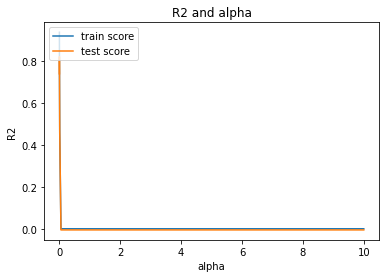

In [103]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [105]:
lasso.coef_

array([ 2.70903686e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.88726948e-02,  4.00822510e-01,  4.61516310e-02,
        1.23404213e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.33397765e-02,
       -0.00000000e+00, -0.00000000e+00, -1.47480349e-02,  1.16480275e-02,
        6.44231328e-03, -0.00000000e+00, -4.66174091e-03,  3.00843568e-03,
       -0.00000000e+00,  0.00000000e+00,  3.19056960e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.07052378e-03,
        1.33929030e-01,  1.95501254e-02,  2.18591323e-02, -1.34439264e-02,
       -0.00000000e+00, -8.71202243e-03,  3.68517264e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.40539054e-04, -3.12291515e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.91138977e-02,  

In [106]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
print(model_cv.best_params_)

{'alpha': 3.0}


In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.018312  6.220137e-03         0.000000        0.000000       1e-05   
1       0.015624  4.089139e-06         0.009436        0.007706      0.0001   
2       0.013666  7.196931e-03         0.003124        0.006248       0.001   
3       0.015621  3.162980e-07         0.006248        0.007653        0.01   
4       0.015621  7.136645e-07         0.006249        0.007653        0.05   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.027408          -0.029500          -0.031171   
1  {'alpha': 0.0001}          -0.027405          -0.029499          -0.031167   
2   {'alpha': 0.001}          -0.027381          -0.029490          -0.031130   
3    {'alpha': 0.01}          -0.027287          -0.029424          -0.031099   
4    {'alpha': 0.05}          -0.028009          -0.029268          -0.031609   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.031340  ...        -0.029954        0.001432               24   
1          -0.031322  ...        -0.029949        0.001428               23   
2          -0.031147  ...        -0.029901        0.001399               22   
3          -0.029784  ...        -0.029613        0.001298               13   
4          -0.027917  ...        -0.029601        0.001554               11   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.018158           -0.018047           -0.018754   
1           -0.018158           -0.018047           -0.018752   
2           -0.018158           -0.018044           -0.018736   
3           -0.018285           -0.018026           -0.018714   
4           -0.019177           -0.018003           -0.019299   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.018716           -0.018342         -0.018403         0.000287  
1           -0.018716           -0.018342         -0.018403         0.000287  
2           -0.018714           -0.018346         -0.018400         0.000283  
3           -0.018796           -0.018479         -0.018460         0.000282  
4           -0.019618           -0.019284         -0.019076         0.000557  

[5 rows x 21 columns]

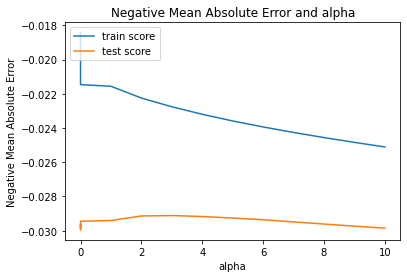

In [109]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.03521552,  0.01281543,  0.01685915,  0.04429939,  0.09813675,
        0.1151602 ,  0.12560615,  0.05593711,  0.0196613 ,  0.00718736,
        0.01294467,  0.01477608,  0.01452489,  0.00296452,  0.00417479,
        0.00804314, -0.00236814,  0.00174015, -0.01149641,  0.0149656 ,
        0.01574844, -0.00969702, -0.00817597,  0.01105283, -0.00203079,
        0.00082663,  0.0161754 ,  0.01096019, -0.00122554,  0.00606254,
       -0.00530108,  0.01762882,  0.08445788,  0.01401676,  0.01305036,
       -0.00516846, -0.00516185, -0.00843012, -0.00497906, -0.00786094,
        0.01857113,  0.0196026 ,  0.03012446, -0.0811632 , -0.00320146,
        0.00360255,  0.01271351, -0.01490108,  0.00200081, -0.00250344,
        0.00399466, -0.00696706,  0.01453392,  0.01088035,  0.02303206,
       -0.007368  ,  0.0054739 ,  0.00804314, -0.00457372, -0.00818552,
        0.0016973 ,  0.0051184 ,  0.00135837, -0.0095309 ,  0.02202134,
        0.00079251, -0.00877212,  0.00038351,  0.00902711,  0.00

In [111]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#r2_score(y_test, y_pred_lm)

In [112]:
# Making predictions using the fourth model

y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [113]:
metric1=[]
print("Training R2")
r2_lr_train = r2_score(y_train, y_pred_train_lr)
print("MSE Train")
mse_lr_train = mean_squared_error(y_train, y_pred_train_lr)
metric1.append(r2_lr_train)
metric1.append(mse_lr_train)
print(metric1)

Training R2
MSE Train
[0.9371553453657677, 0.0007573998664752688]


In [114]:

metric2=[]
print("Test R2")
r2_lr_test = r2_score(y_test, y_pred_test_lr)
print("MSE Test")
mse_lr_test = mean_squared_error(y_test, y_pred_test_lr)
metric2.append(r2_lr_test)
metric2.append(mse_lr_test)
print(metric2)

Test R2
MSE Test
[-5.921266814134905e+19, 7.34861821155087e+17]


In [115]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [116]:
metric3=[]
print("Training R2")
r2_rg_train = r2_score(y_train, y_pred_train_ridge)
print("MSE Train")
mse_rg_train = mean_squared_error(y_train, y_pred_train_ridge)
metric3.append(r2_rg_train)
metric3.append(mse_rg_train)
print(metric3)

Training R2
MSE Train
[0.8885086018370983, 0.0013436873919221957]


In [117]:
metric4=[]
print("Test R2")
r2_rg_test = r2_score(y_test, y_pred_test_ridge)
print("MSE Test")
mse_rg_test = mean_squared_error(y_test, y_pred_test_ridge)
metric4.append(r2_rg_test)
metric4.append(mse_rg_test)
print(metric4)

Test R2
MSE Test
[0.8421076268493819, 0.0019595313050745134]


In [118]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)


In [119]:
print("Training R2")
#r2_score(y_train, y_pred_train_lasso)
metric5=[]
print("Training R2")
r2_ls_train = r2_score(y_train, y_pred_train_lasso)
print("MSE Train")
mse_ls_train = mean_squared_error(y_train, y_pred_train_lasso)
metric5.append(r2_ls_train)
metric5.append(mse_ls_train)
print(metric5)

Training R2
Training R2
MSE Train
[0.8930606876406694, 0.0012888259371194733]


In [120]:
print("Testing R2")
#r2_score(y_test, y_pred_test_lasso)
metric6=[]
print("Test R2")
r2_ls_test = r2_score(y_test, y_pred_test_lasso)
print("MSE Test")
mse_ls_test = mean_squared_error(y_test, y_pred_test_lasso)
metric6.append(r2_ls_test)
metric6.append(mse_ls_test)
print(metric6)

Testing R2
Test R2
MSE Test
[0.8409738501017322, 0.001973602098904852]


In [121]:
#lr_table = {'Metric': ['R2 Score(Train)','R2 Score (Test)','RSS(Train)','RSS(Test)','MSE(Train)',
 #                      'MSE(Test)'],'Linear Regression':metric}

#lr_metric = pd.DataFrame(lr_table,columns=['Metric','Linear Regression'])
lr_metric_train = pd.Series(metric1,name='lr train')
lr_metric_test = pd.Series(metric2,name='lr test')
rg_metric_train = pd.Series(metric3,name='ridge train')
rg_metric_test = pd.Series(metric4,name='ridge test')
ls_metric_train = pd.Series(metric5,name='lasso train')
ls_metric_test = pd.Series(metric6,name='lasso test')
#rg_metric_test = pd.series(metric3,name='ridge train')

final_metric = pd.concat([lr_metric_train,lr_metric_test,rg_metric_train,rg_metric_test,ls_metric_train,ls_metric_test],axis=1)
final_metric

lr train       lr test  ridge train  ridge test  lasso train  lasso test
0  0.937155 -5.921267e+19     0.888509    0.842108     0.893061    0.840974
1  0.000757  7.348618e+17     0.001344    0.001960     0.001289    0.001974

In [ ]:
# Based on the table above, we choose to use lasso regression as it has the highest R-Square value 

In [122]:
df_coeff = pd.DataFrame(index=X_train.columns)
df_coeff.rows = X_train.columns

In [123]:
df_coeff["linear"]=lr.coef_
df_coeff["Ridge"]=ridge.coef_
df_coeff["Lasso"]=lasso.coef_

In [124]:
pd.options.display.max_rows = 250
print(df_coeff)

                                 linear     Ridge     Lasso
MasVnrArea                 4.391271e-02  0.035216  0.027090
BsmtFinSF2                -2.443938e-02  0.012815  0.000000
BsmtUnfSF                 -6.119118e-02  0.016859  0.000000
TotalBsmtSF                3.960105e-01  0.044299  0.000000
1stFlrSF                   2.786536e-01  0.098137  0.000000
2ndFlrSF                   2.004654e-01  0.115160  0.048873
GrLivArea                  1.036957e-01  0.125606  0.400823
GarageArea                 4.777587e-02  0.055937  0.046152
WoodDeckSF                 1.076146e-02  0.019661  0.012340
OpenPorchSF                1.603293e-02  0.007187  0.000000
SaleType_CWD               1.954220e-02  0.012945  0.000000
SaleType_Con               3.878096e-02  0.014776  0.000000
SaleType_ConLD             2.849312e-02  0.014525  0.000000
SaleType_ConLI             3.205266e-03  0.002965  0.000000
SaleType_ConLw             1.518586e-02  0.004175  0.000000
SaleType_New              -1.023765e+10 

In [ ]:
#Based on the Lasso regression coeffecients, the most imprortant predictors are 
#GrLivArea,RoofMatl_WdShngl , BldgType_2fmCon , Neighborhood_NoRidge , Neighborhood_NridgHt , Condition2_PosN

In [ ]:
#The equation for the sale price is 

0.02709*MasVnrArea 
0.048873*2ndFlrSF
0.400823*GrLivArea
0.046152*GarageArea
0.01234*WoodDeckSF
0.01334*SaleType_New
-0.014748*Condition1_Feedr
0.011648*Condition1_Norm
0.006442*Condition1_PosA
-0.004662*Condition1_RRAe
0.003008*Condition1_RRAn
0.031906*RoofMatl_CompShg
0.003071*RoofMatl_WdShake
0.133929*RoofMatl_WdShngl
0.01955*HouseStyle_1.5Unf
0.021859*HouseStyle_1Story
-0.013444*HouseStyle_2.5Fin
-0.008712*HouseStyle_2Story
0.003685*HouseStyle_SFoyer
0.000241*Condition2_PosA
-0.312292*Condition2_PosN
0.019114*Functional_Typ
0.005183*SaleCondition_Alloca
-0.001633*SaleCondition_Family
0.005327*SaleCondition_Normal
0.002806*SaleCondition_Partial
-0.005587*RoofStyle_Gable
0.020313*Heating_GasW
0.004732*GarageType_Attchd
0.000964*GarageType_Detchd
0.00617*Foundation_CBlock
0.003561*Foundation_PConc
-0.003361*BsmtFinType2_BLQ
0.002934*BsmtFinType2_GLQ
-0.000323*BsmtFinType2_Rec
0.009751*BsmtFinType1_GLQ
-0.004073*BsmtFinType1_LwQ
-0.034399*BsmtFinType1_NoBasement
-0.004284*BsmtFinType1_Rec
-0.010523*BsmtFinType1_Unf
0.005504*MSZoning_RL
0.018142*LotConfig_CulDSac
-0.008836*LotConfig_FR2
-0.000806*LotConfig_Inside
-0.001295*HeatingQC_Fa
-0.006738*HeatingQC_Gd
-0.006845*HeatingQC_TA
-0.011774*GarageQual_Fa
0.015169*GarageQual_Gd
-0.004229*GarageCond_Gd
0.005259*GarageCond_TA
0.005114*Electrical_SBrkr
-0.021925*BldgType_2fmCon
-0.019398*BldgType_Duplex
-0.027065*BldgType_Twnhs
-0.025825*BldgType_TwnhsE
-0.002369*MasVnrType_BrkFace
0.000152*MasVnrType_None
0.001826*LotShape_IR2
-0.021282*LotShape_IR3
0.000736*LotShape_Reg
0.020811*LandContour_HLS
0.016278*LandContour_Low
0.019675*LandContour_Lvl
-0.047758*KitchenQual_Fa
-0.046138*KitchenQual_Gd
-0.053792*KitchenQual_TA
-0.035718*ExterQual_Fa
-0.010048*ExterQual_Gd
-0.021318*ExterQual_TA
-0.033713*BsmtQual_Fa
-0.03958*BsmtQual_Gd
-0.008685*BsmtQual_NoBasement
-0.044009*BsmtQual_TA
0.03563*BsmtExposure_Gd
-0.00415*BsmtExposure_Mn
-0.01281*BsmtExposure_No
-0.01878*BsmtExposure_NoBasement
0.008233*BsmtCond_Gd
0.010471*BsmtCond_TA
0.013522*LandSlope_Sev
-0.006561*GarageFinish_RFn 
-0.008573*GarageFinish_Unf
+ 0.015322*CentralAir_Y
-0.000976*Neighborhood_CollgCr
+0.032603*Neighborhood_Crawfor
-0.026178*Neighborhood_Edwards
-0.013513*Neighborhood_IDOTRR
-0.020585*Neighborhood_MeadowV
-0.015674*Neighborhood_Mitchel
-0.013545*Neighborhood_NAmes
+0.066664*Neighborhood_NoRidge
+0.046538*Neighborhood_NridgHt
-0.013553*Neighborhood_OldTown
-0.0112*Neighborhood_Sawyer
+0.03412*Neighborhood_Somerst
+0.040078*Neighborhood_StoneBr
+0.013968*Neighborhood_Veenker
-0.008959*FireplaceQu_NoFireplaceQu
-0.006715*FireplaceQu_Po
+0.002613*Fence_MnPrv
+0.012606*Exterior2nd_CmentBd
+0.000228*Exterior2nd_HdBoard
+0.021535*Exterior2nd_ImStucc
-0.000521*Exterior2nd_Plywood
-0.016413*Exterior2nd_Stucco
+0.008317*Exterior2nd_VinylSd
-0.01005*Exterior2nd_Wd Shng
+0.028366*Exterior1st_BrkFace
+0.000197*Exterior1st_CemntBd
-0.000501*Exterior1st_HdBoard
-0.001028*Exterior1st_Stucco
+0.0001*Exterior1st_Wd Sdng
+0.003067*Exterior1st_WdShing
